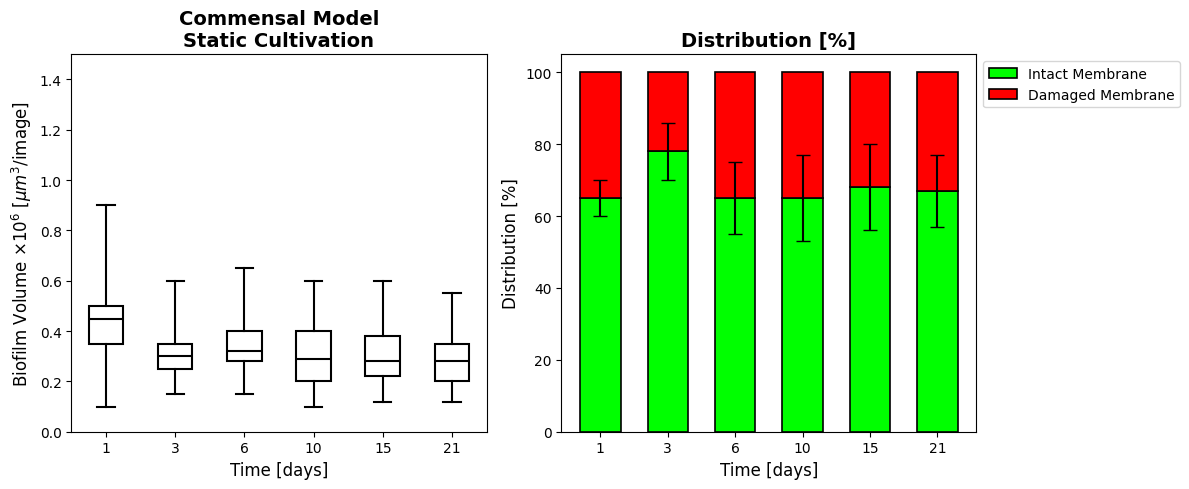

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------------------
# 1. データの定義（画像から私が目視で抽出した近似値です）
# ---------------------------------------------------------
days = ['1', '3', '6', '10', '15', '21']

# 左側：箱ひげ図のデータ (Biofilm Volume)
# plt.boxplot ではなく、統計値を直接指定できる ax.bxp を使います
# med: 中央値, q1: 第1四分位(箱の下), q3: 第3四分位(箱の上), whislo/whishi: ヒゲの端
box_stats = [
    {'med': 0.45, 'q1': 0.35, 'q3': 0.50, 'whislo': 0.10, 'whishi': 0.90, 'label': '1'},
    {'med': 0.30, 'q1': 0.25, 'q3': 0.35, 'whislo': 0.15, 'whishi': 0.60, 'label': '3'},
    {'med': 0.32, 'q1': 0.28, 'q3': 0.40, 'whislo': 0.15, 'whishi': 0.65, 'label': '6'},
    {'med': 0.29, 'q1': 0.20, 'q3': 0.40, 'whislo': 0.10, 'whishi': 0.60, 'label': '10'},
    {'med': 0.28, 'q1': 0.22, 'q3': 0.38, 'whislo': 0.12, 'whishi': 0.60, 'label': '15'},
    {'med': 0.28, 'q1': 0.20, 'q3': 0.35, 'whislo': 0.12, 'whishi': 0.55, 'label': '21'},
]

# 右側：積み上げ棒グラフのデータ (Distribution %)
# 緑(Intact)の値を定義すれば、赤(Damaged)は 100 - 緑 で計算できます
intact_pct = np.array([65, 78, 65, 65, 68, 67])  # 目視推定値
damaged_pct = 100 - intact_pct
# エラーバー（標準偏差）の推定値（黒い線）
errors = [5, 8, 10, 12, 12, 10]

# ---------------------------------------------------------
# 2. グラフの描画
# ---------------------------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# --- 左：箱ひげ図 (Commensal Model) ---
# ax.bxp は統計辞書から直接描画する関数です
ax[0].bxp(box_stats, showfliers=False, patch_artist=True,
          boxprops=dict(facecolor='white', linewidth=1.5),
          medianprops=dict(color='black', linewidth=1.5),
          whiskerprops=dict(linewidth=1.5),
          capprops=dict(linewidth=1.5))

ax[0].set_title("Commensal Model\nStatic Cultivation", fontsize=14, fontweight='bold')
ax[0].set_ylabel(r"Biofilm Volume $\times 10^6$ [$\mu m^3$/image]", fontsize=12)
ax[0].set_xlabel("Time [days]", fontsize=12)
ax[0].set_ylim(0, 1.5)

# --- 右：積み上げ棒グラフ (Distribution) ---
bar_width = 0.6
x_pos = np.arange(len(days))

# 緑のバー (Intact)
p1 = ax[1].bar(x_pos, intact_pct, bar_width, label='Intact Membrane',
               color='lime', edgecolor='black', linewidth=1.2, yerr=errors, capsize=5)
# 赤のバー (Damaged) - bottom=intact_pct で積み上げ
p2 = ax[1].bar(x_pos, damaged_pct, bar_width, bottom=intact_pct, label='Damaged Membrane',
               color='red', edgecolor='black', linewidth=1.2)

ax[1].set_title("Distribution [%]", fontsize=14, fontweight='bold')
ax[1].set_ylabel("Distribution [%]", fontsize=12)
ax[1].set_xlabel("Time [days]", fontsize=12)
ax[1].set_xticks(x_pos)
ax[1].set_xticklabels(days)
ax[1].set_ylim(0, 105) # 少し余裕を持たせる

# 凡例の設定（グラフの外に配置）
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

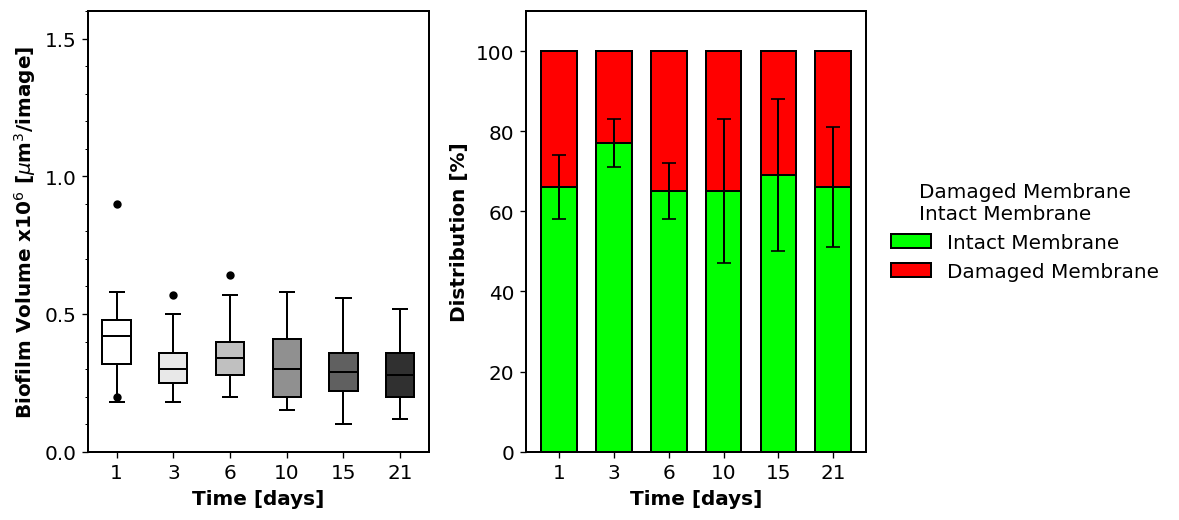

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
# ---------------------------------------------------------
# 1. 論文スタイル設定 (フォントや線の太さ)
# ---------------------------------------------------------
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans'] # Arialがあれば使用
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2 # 軸の太さを少し太く

# ---------------------------------------------------------
# 2. データ定義（画像から外れ値まで精密に読み取り）
# ---------------------------------------------------------
days = ['1', '3', '6', '10', '15', '21']

# 箱ひげ図の色（白 -> 濃いグレー）
box_colors = ['#FFFFFF', '#E8E8E8', '#C0C0C0', '#909090', '#606060', '#303030']

# 箱ひげ図データ（fliers = 外れ値の点を追加）
box_stats = [
    {'med': 0.42, 'q1': 0.32, 'q3': 0.48, 'whislo': 0.18, 'whishi': 0.58, 'fliers': [0.90, 0.20], 'label': '1'},
    {'med': 0.30, 'q1': 0.25, 'q3': 0.36, 'whislo': 0.18, 'whishi': 0.50, 'fliers': [0.57],       'label': '3'},
    {'med': 0.34, 'q1': 0.28, 'q3': 0.40, 'whislo': 0.20, 'whishi': 0.57, 'fliers': [0.64],       'label': '6'},
    {'med': 0.30, 'q1': 0.20, 'q3': 0.41, 'whislo': 0.15, 'whishi': 0.58, 'fliers': [],           'label': '10'},
    {'med': 0.29, 'q1': 0.22, 'q3': 0.36, 'whislo': 0.10, 'whishi': 0.56, 'fliers': [],           'label': '15'},
    {'med': 0.28, 'q1': 0.20, 'q3': 0.36, 'whislo': 0.12, 'whishi': 0.52, 'fliers': [],           'label': '21'},
]

# 棒グラフデータ
intact_pct  = np.array([66, 77, 65, 65, 69, 66]) # 画像から微調整
damaged_pct = 100 - intact_pct
errors      = [8, 6, 7, 18, 19, 15] # エラーバーの長さ

# ---------------------------------------------------------
# 3. グラフ描画
# ---------------------------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(10, 4.5), dpi=120) # DPIを上げて高画質に

# === 左：箱ひげ図 (Biofilm Volume) ===
# ax.bxpで描画し、戻り値(dict)を受け取って色を後から変更する
bplot = ax[0].bxp(box_stats, showfliers=True, patch_artist=True,
                  boxprops=dict(linewidth=1.2),
                  medianprops=dict(color='black', linewidth=1.2),
                  whiskerprops=dict(linewidth=1.2),
                  capprops=dict(linewidth=1.2),
                  flierprops=dict(marker='o', markerfacecolor='black', markersize=4, linestyle='none'))

# 箱ごとに色を変える（グラデーション適用）
for patch, color in zip(bplot['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black') # 枠線は黒

ax[0].set_ylabel(r"Biofilm Volume x10$^6$ [$\mu$m$^3$/image]", fontweight='bold')
ax[0].set_xlabel("Time [days]", fontweight='bold')
# Y軸の表示範囲を 0 からにする（0.1だと下が切れるため）
ax[0].set_ylim(0, 1.6)

# 大目盛り（数字が表示される部分）：0.5 刻み
ax[0].set_yticks([0, 0.5, 1.0, 1.5])

# 小目盛り（数字なしの細かい線）：0.1 刻み ★ここがポイント
ax[0].yaxis.set_minor_locator(MultipleLocator(0.1))

# === 右：積み上げ棒グラフ (Distribution) ===
x_pos = np.arange(len(days))
width = 0.65 # バーを少し太く

# 緑 (Intact) + エラーバー
# capsize=4 でエラーバーの横棒を再現
ax[1].bar(x_pos, intact_pct, width, label='Intact Membrane',
          color='#00FF00', edgecolor='black', linewidth=1.2,
          yerr=errors, capsize=4, error_kw=dict(linewidth=1.2))

# 赤 (Damaged)
ax[1].bar(x_pos, damaged_pct, width, bottom=intact_pct, label='Damaged Membrane',
          color='#FF0000', edgecolor='black', linewidth=1.2)

ax[1].set_ylabel("Distribution [%]", fontweight='bold')
ax[1].set_xlabel("Time [days]", fontweight='bold')
ax[1].set_xticks(x_pos)
ax[1].set_xticklabels(days)
ax[1].set_ylim(0, 110)
ax[1].set_yticks([0, 20, 40, 60, 80, 100])

# 凡例（Legend）を右側に配置
ax[1].legend(loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False,
             title="Damaged Membrane\nIntact Membrane")
# 注意: 元画像では凡例のテキストが縦書きのように配置されていますが、ここでは標準的な配置にしています。

plt.tight_layout()
plt.savefig("reproduction_check.png", transparent=True, dpi=300)
plt.show()

# plt.show() の前にこれを実行

In [ ]:
Screenshot 2026-02-03 160423

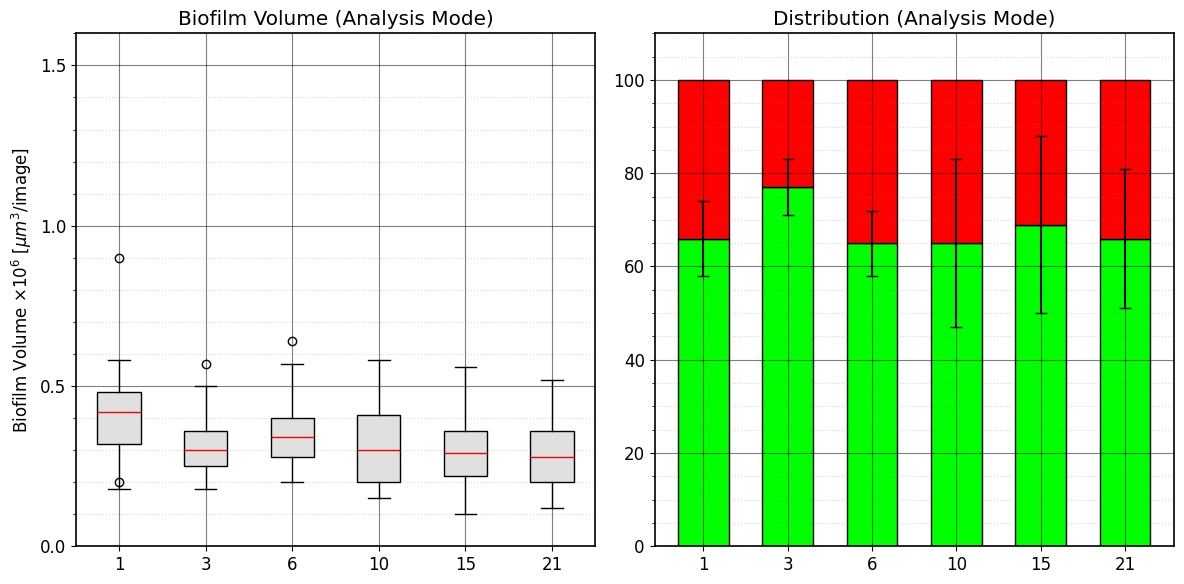

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

# === 1. データ定義（画像から抽出した数値） ===
days = ['1', '3', '6', '10', '15', '21']

# 箱ひげ図データ (Biofilm Volume)
# fliers: 外れ値の点
box_stats = [
    {'med': 0.42, 'q1': 0.32, 'q3': 0.48, 'whislo': 0.18, 'whishi': 0.58, 'fliers': [0.90, 0.20], 'label': '1'},
    {'med': 0.30, 'q1': 0.25, 'q3': 0.36, 'whislo': 0.18, 'whishi': 0.50, 'fliers': [0.57],       'label': '3'},
    {'med': 0.34, 'q1': 0.28, 'q3': 0.40, 'whislo': 0.20, 'whishi': 0.57, 'fliers': [0.64],       'label': '6'},
    {'med': 0.30, 'q1': 0.20, 'q3': 0.41, 'whislo': 0.15, 'whishi': 0.58, 'fliers': [],           'label': '10'},
    {'med': 0.29, 'q1': 0.22, 'q3': 0.36, 'whislo': 0.10, 'whishi': 0.56, 'fliers': [],           'label': '15'},
    {'med': 0.28, 'q1': 0.20, 'q3': 0.36, 'whislo': 0.12, 'whishi': 0.52, 'fliers': [],           'label': '21'},
]

# 棒グラフデータ
intact_pct  = np.array([66, 77, 65, 65, 69, 66])
damaged_pct = 100 - intact_pct
errors      = [8, 6, 7, 18, 19, 15]

# === 2. グラフ描画（分析用グリッド設定） ===
fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=100) # 少し大きく表示

# --- 左：箱ひげ図 ---
ax[0].bxp(box_stats, showfliers=True, patch_artist=True,
          boxprops=dict(facecolor='#E0E0E0'), medianprops=dict(color='red')) # 中央値を赤にして見やすく

ax[0].set_title("Biofilm Volume (Analysis Mode)")
ax[0].set_ylabel(r"Biofilm Volume $\times 10^6$ [$\mu m^3$/image]")
ax[0].set_ylim(0, 1.6)

# ★ここがポイント：細かい目盛りとグリッド★
# 大目盛り（0.5刻み）
ax[0].yaxis.set_major_locator(MultipleLocator(0.5))
# 小目盛り（0.1刻み）
ax[0].yaxis.set_minor_locator(MultipleLocator(0.1))

# グリッド線を描画（これがあると値を読みやすい）
ax[0].grid(which='major', color='black', alpha=0.5, linestyle='-') # 濃い線
ax[0].grid(which='minor', color='gray',  alpha=0.3, linestyle=':') # 薄い線(0.1刻み)


# --- 右：積み上げ棒グラフ ---
x_pos = np.arange(len(days))
ax[1].bar(x_pos, intact_pct, 0.6, label='Intact', color='lime', edgecolor='black', yerr=errors, capsize=4)
ax[1].bar(x_pos, damaged_pct, 0.6, bottom=intact_pct, label='Damaged', color='red', edgecolor='black')

ax[1].set_title("Distribution (Analysis Mode)")
ax[1].set_xticks(x_pos)
ax[1].set_xticklabels(days)
ax[1].set_ylim(0, 110)

# 棒グラフ側も細かくグリッドを入れる（5%刻み）
ax[1].yaxis.set_major_locator(MultipleLocator(20))
ax[1].yaxis.set_minor_locator(MultipleLocator(5))
ax[1].grid(which='major', color='black', alpha=0.5, linestyle='-')
ax[1].grid(which='minor', color='gray',  alpha=0.3, linestyle=':')

plt.tight_layout()
plt.show()

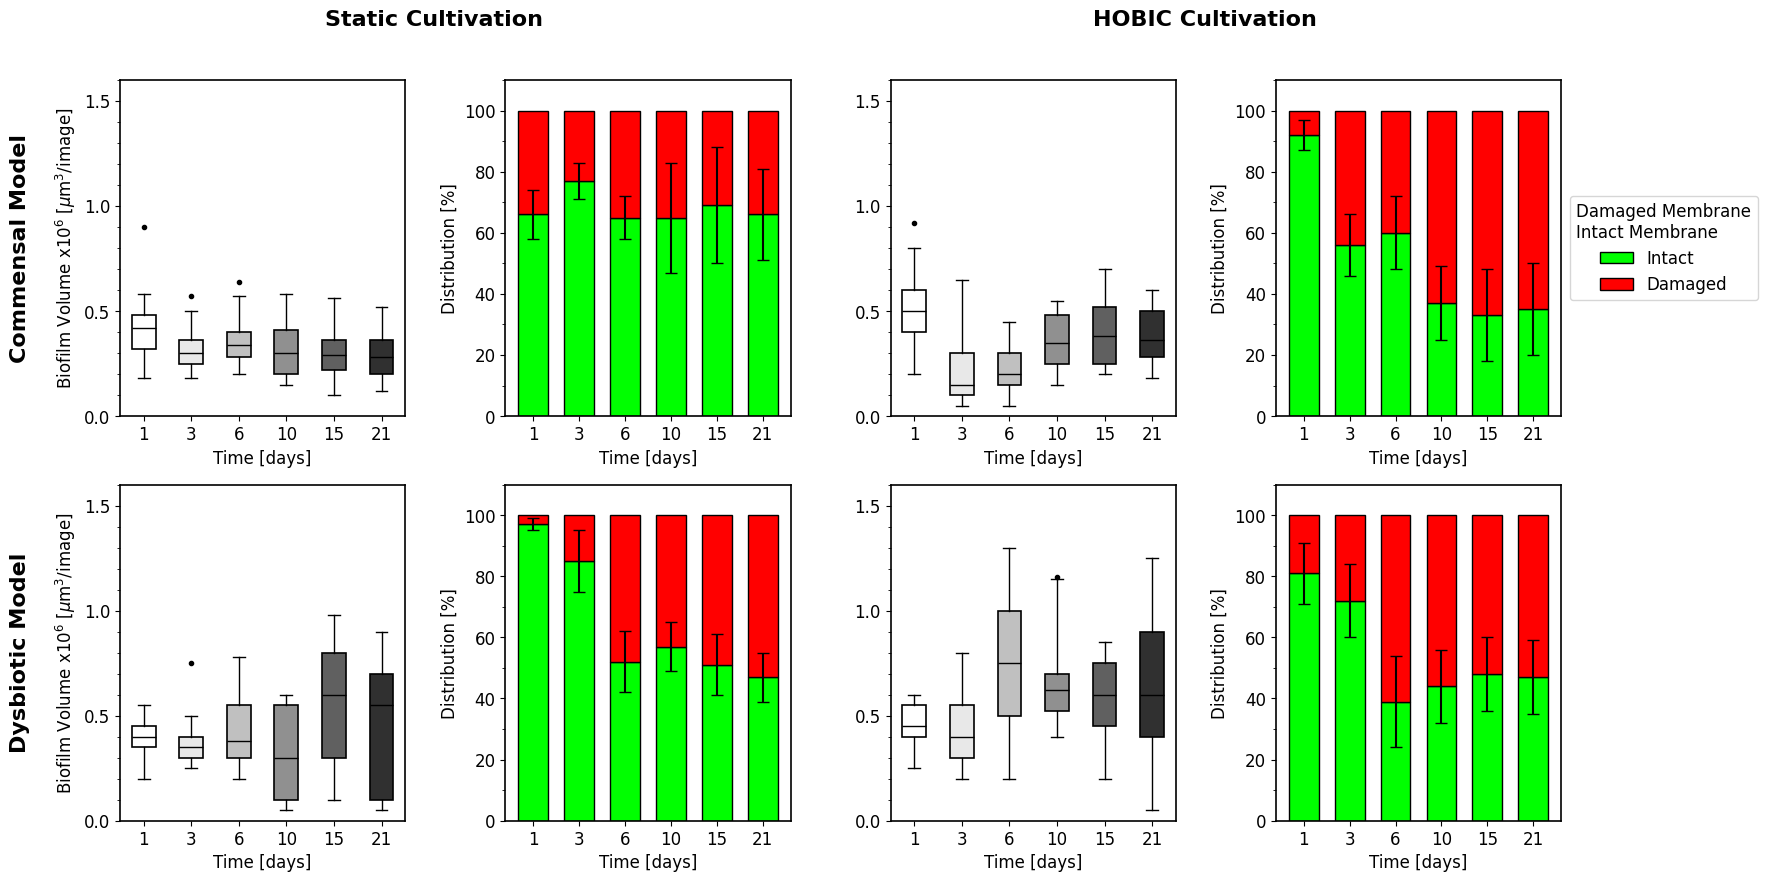

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

# ==========================================
# 1. データ定義 (画像から目視抽出した全データ)
# ==========================================
days = ['1', '3', '6', '10', '15', '21']
x_pos = np.arange(len(days))

# --- データセット作成関数 ---
def get_data(condition):
    if condition == 'Commensal_Static':
        # 左上
        box_stats = [
            {'med': 0.42, 'q1': 0.32, 'q3': 0.48, 'whislo': 0.18, 'whishi': 0.58, 'fliers': [0.90], 'label': '1'},
            {'med': 0.30, 'q1': 0.25, 'q3': 0.36, 'whislo': 0.18, 'whishi': 0.50, 'fliers': [0.57], 'label': '3'},
            {'med': 0.34, 'q1': 0.28, 'q3': 0.40, 'whislo': 0.20, 'whishi': 0.57, 'fliers': [0.64], 'label': '6'},
            {'med': 0.30, 'q1': 0.20, 'q3': 0.41, 'whislo': 0.15, 'whishi': 0.58, 'fliers': [],     'label': '10'},
            {'med': 0.29, 'q1': 0.22, 'q3': 0.36, 'whislo': 0.10, 'whishi': 0.56, 'fliers': [],     'label': '15'},
            {'med': 0.28, 'q1': 0.20, 'q3': 0.36, 'whislo': 0.12, 'whishi': 0.52, 'fliers': [],     'label': '21'},
        ]
        intact = np.array([66, 77, 65, 65, 69, 66])
        errors = [8, 6, 7, 18, 19, 15]

    elif condition == 'Commensal_HOBIC':
        # 右上 (Day 3でガクッと下がるのが特徴)
        box_stats = [
            {'med': 0.50, 'q1': 0.40, 'q3': 0.60, 'whislo': 0.20, 'whishi': 0.80, 'fliers': [0.92], 'label': '1'},
            {'med': 0.15, 'q1': 0.10, 'q3': 0.30, 'whislo': 0.05, 'whishi': 0.65, 'fliers': [],     'label': '3'},
            {'med': 0.20, 'q1': 0.15, 'q3': 0.30, 'whislo': 0.05, 'whishi': 0.45, 'fliers': [],     'label': '6'},
            {'med': 0.35, 'q1': 0.25, 'q3': 0.48, 'whislo': 0.15, 'whishi': 0.55, 'fliers': [],     'label': '10'},
            {'med': 0.38, 'q1': 0.25, 'q3': 0.52, 'whislo': 0.20, 'whishi': 0.70, 'fliers': [],     'label': '15'},
            {'med': 0.36, 'q1': 0.28, 'q3': 0.50, 'whislo': 0.18, 'whishi': 0.60, 'fliers': [],     'label': '21'},
        ]
        intact = np.array([92, 56, 60, 37, 33, 35]) # 後半赤が多い
        errors = [5, 10, 12, 12, 15, 15]

    elif condition == 'Dysbiotic_Static':
        # 左下 (Day 15, 21で分散が大きい)
        box_stats = [
            {'med': 0.40, 'q1': 0.35, 'q3': 0.45, 'whislo': 0.20, 'whishi': 0.55, 'fliers': [],     'label': '1'},
            {'med': 0.35, 'q1': 0.30, 'q3': 0.40, 'whislo': 0.25, 'whishi': 0.50, 'fliers': [0.75], 'label': '3'},
            {'med': 0.38, 'q1': 0.30, 'q3': 0.55, 'whislo': 0.20, 'whishi': 0.78, 'fliers': [],     'label': '6'},
            {'med': 0.30, 'q1': 0.10, 'q3': 0.55, 'whislo': 0.05, 'whishi': 0.60, 'fliers': [],     'label': '10'},
            {'med': 0.60, 'q1': 0.30, 'q3': 0.80, 'whislo': 0.10, 'whishi': 0.98, 'fliers': [],     'label': '15'},
            {'med': 0.55, 'q1': 0.10, 'q3': 0.70, 'whislo': 0.05, 'whishi': 0.90, 'fliers': [],     'label': '21'},
        ]
        intact = np.array([97, 85, 52, 57, 51, 47])
        errors = [2, 10, 10, 8, 10, 8]

    elif condition == 'Dysbiotic_HOBIC':
        # 右下 (Day 6で一度増える)
        box_stats = [
            {'med': 0.45, 'q1': 0.40, 'q3': 0.55, 'whislo': 0.25, 'whishi': 0.60, 'fliers': [],     'label': '1'},
            {'med': 0.40, 'q1': 0.30, 'q3': 0.55, 'whislo': 0.20, 'whishi': 0.80, 'fliers': [],     'label': '3'},
            {'med': 0.75, 'q1': 0.50, 'q3': 1.00, 'whislo': 0.20, 'whishi': 1.30, 'fliers': [],     'label': '6'}, # 特徴的な高い箱
            {'med': 0.62, 'q1': 0.52, 'q3': 0.70, 'whislo': 0.40, 'whishi': 1.15, 'fliers': [1.16], 'label': '10'},
            {'med': 0.60, 'q1': 0.45, 'q3': 0.75, 'whislo': 0.20, 'whishi': 0.85, 'fliers': [],     'label': '15'},
            {'med': 0.60, 'q1': 0.40, 'q3': 0.90, 'whislo': 0.05, 'whishi': 1.25, 'fliers': [],     'label': '21'},
        ]
        intact = np.array([81, 72, 39, 44, 48, 47])
        errors = [10, 12, 15, 12, 12, 12]

    return box_stats, intact, errors

# ==========================================
# 2. 描画設定 (2行 x 4列 のグリッドを作成)
# ==========================================
# 実際のレイアウト：
# Row 1: [Com Static Box] [Com Static Bar] | [Com HOBIC Box] [Com HOBIC Bar]
# Row 2: [Dys Static Box] [Dys Static Bar] | [Dys HOBIC Box] [Dys HOBIC Bar]

fig, axes = plt.subplots(2, 4, figsize=(18, 9), dpi=100)
plt.subplots_adjust(wspace=0.3, hspace=0.4)

conditions = [
    ('Commensal_Static', 'Commensal Model', 'Static Cultivation'),
    ('Commensal_HOBIC',  '',                'HOBIC Cultivation'),
    ('Dysbiotic_Static', 'Dysbiotic Model', ''),
    ('Dysbiotic_HOBIC',  '',                '')
]

box_colors = ['#FFFFFF', '#E8E8E8', '#C0C0C0', '#909090', '#606060', '#303030']

# ループで4つのパネル（8つのグラフ）を描画
for i, (cond_key, row_title, col_title) in enumerate(conditions):
    row = i // 2  # 0 or 1
    col_start = (i % 2) * 2

    # データ取得
    box_stats, intact, err = get_data(cond_key)
    damaged = 100 - intact

    # --- A. 箱ひげ図 (Boxplot) ---
    ax_box = axes[row, col_start]

    bplot = ax_box.bxp(box_stats, showfliers=True, patch_artist=True,
                       boxprops=dict(linewidth=1.2), medianprops=dict(color='black'),
                       flierprops=dict(marker='o', markerfacecolor='black', markersize=3))

    # グラデーション適用
    for patch, color in zip(bplot['boxes'], box_colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')

    # 軸設定
    ax_box.set_ylim(0, 1.6)
    ax_box.yaxis.set_major_locator(MultipleLocator(0.5))
    ax_box.yaxis.set_minor_locator(MultipleLocator(0.1))
    ax_box.set_ylabel(r"Biofilm Volume x10$^6$ [$\mu$m$^3$/image]" if col_start==0 else "")
    ax_box.set_xlabel("Time [days]")

    # タイトル（行・列ラベルとして配置）
    if row == 0 and col_title:
        # 上段に "Static Cultivation" などを表示
        ax_box.text(1.1, 1.15, col_title, transform=ax_box.transAxes,
                    fontsize=16, fontweight='bold', ha='center', va='bottom')
    if col_start == 0 and row_title:
        # 左端に "Commensal Model" などを表示
        ax_box.text(-0.35, 0.5, row_title, transform=ax_box.transAxes,
                    fontsize=16, fontweight='bold', ha='center', va='center', rotation=90)

    # --- B. 棒グラフ (Barplot) ---
    ax_bar = axes[row, col_start + 1]

    ax_bar.bar(x_pos, intact, 0.65, color='lime', edgecolor='black', yerr=err, capsize=4, label='Intact')
    ax_bar.bar(x_pos, damaged, 0.65, bottom=intact, color='red', edgecolor='black', label='Damaged')

    ax_bar.set_ylim(0, 110)
    ax_bar.set_yticks([0, 20, 40, 60, 80, 100])
    ax_bar.yaxis.set_minor_locator(MultipleLocator(10))
    ax_bar.set_xticks(x_pos)
    ax_bar.set_xticklabels(days)
    ax_bar.set_xlabel("Time [days]")
    ax_bar.set_ylabel("Distribution [%]")

    # 凡例は右上のグラフにだけつける（元の画像に合わせて）
    if i == 1:
        ax_bar.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Damaged Membrane\nIntact Membrane")

plt.tight_layout() # レイアウト自動調整
# 左側の余白（行タイトル用）を確保
plt.subplots_adjust(left=0.08, top=0.9, wspace=0.35)
plt.show()

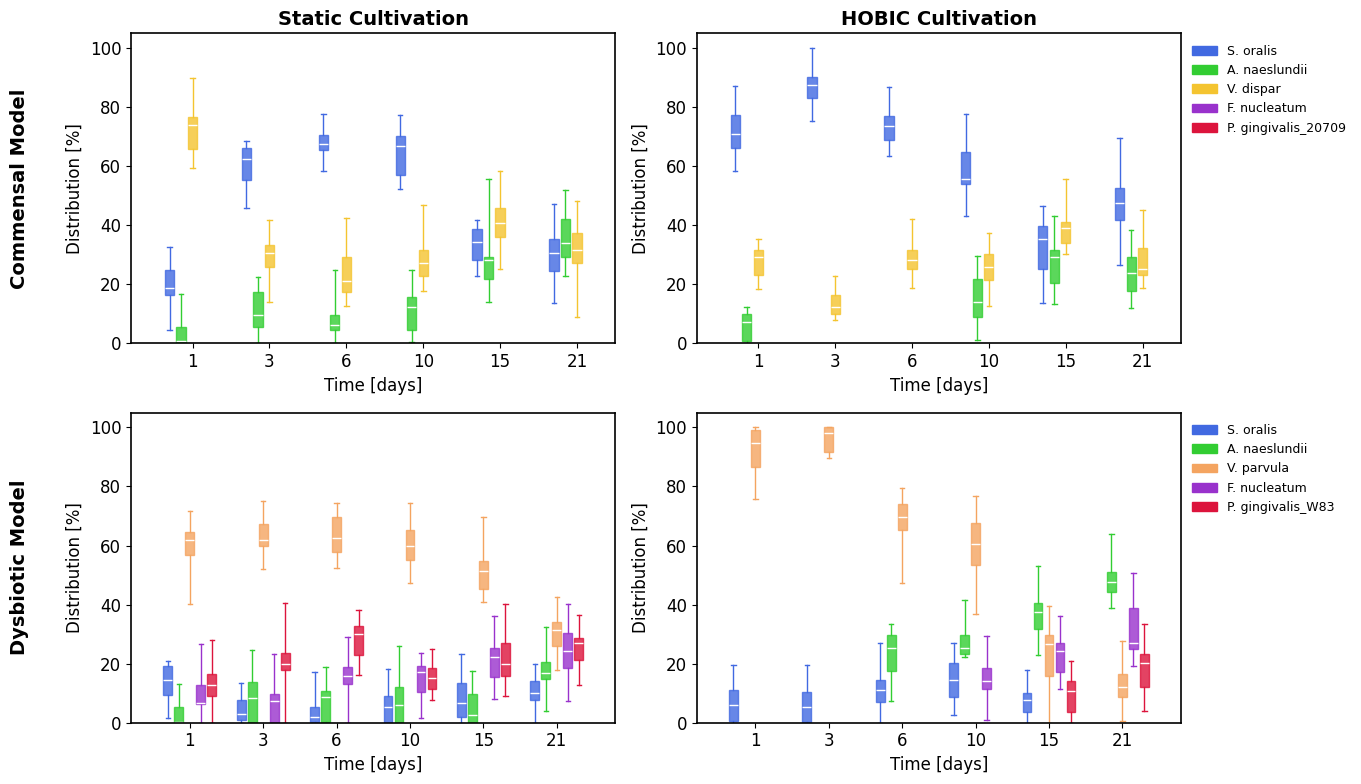

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

# ---------------------------------------------------------
# 1. データ生成ロジック (画像の特徴を模倣する関数)
# ---------------------------------------------------------
# 各菌のトレンドを定義（平均値の推移）
# 時間: [1, 3, 6, 10, 15, 21]
trends = {
    # --- Commensal Model (健康) ---
    'Commensal_Static': {
        'Blue':   [20, 60, 70, 65, 35, 30], # S. oralis (最初低いが急増して維持)
        'Green':  [5,  10, 5,  10, 25, 35], # A. naeslundii (後半増える)
        'Yellow': [75, 30, 25, 25, 40, 35], # V. dispar (最初多いが減る)
        'Purple': [0,  0,  0,  0,  0,  0],  # F. nucleatum (ほぼいない)
        'Red':    [0,  0,  0,  0,  0,  0]   # P. gingivalis (ほぼいない)
    },
    'Commensal_HOBIC': {
        'Blue':   [70, 85, 75, 60, 30, 45], # HOBICだとS. oralisが圧倒的
        'Green':  [5,  0,  0,  15, 30, 25],
        'Yellow': [25, 15, 25, 25, 40, 30],
        'Purple': [0,  0,  0,  0,  0,  0],
        'Red':    [0,  0,  0,  0,  0,  0]
    },
    # --- Dysbiotic Model (不健康・病気) ---
    'Dysbiotic_Static': {
        'Blue':   [15, 5,  5,  5,  5,  5],  # S. oralis (低い)
        'Green':  [5,  5,  5,  5,  5,  15],
        'Orange': [60, 60, 65, 60, 50, 30], # V. parvula (常に支配的)
        'Purple': [10, 10, 15, 15, 20, 25], # F. nucleatum (徐々に増える)
        'Red':    [10, 20, 30, 15, 20, 25]  # P. gingivalis (目立つ)
    },
    'Dysbiotic_HOBIC': {
        'Blue':   [5,  5,  10, 15, 5,  0],
        'Green':  [0,  0,  20, 25, 40, 50], # 後半Greenが急増する特徴あり
        'Orange': [95, 95, 70, 60, 20, 10], # 最初V. parvulaが独占、あとで減る
        'Purple': [0,  0,  0,  10, 25, 30],
        'Red':    [0,  0,  0,  0,  10, 20]
    }
}

def generate_box_data(mean_val, spread=10):
    """平均値周辺にばらつくデータを生成（箱ひげ図用）"""
    if mean_val <= 1: return [] # ほぼゼロなら空
    # 正規分布でデータを生成し、0-100の範囲に収める
    data = np.random.normal(mean_val, spread, 15)
    data = np.clip(data, 0, 100)

    # 統計量を計算して返す
    return {
        'med': np.median(data),
        'q1': np.percentile(data, 25),
        'q3': np.percentile(data, 75),
        'whislo': np.min(data),
        'whishi': np.max(data),
        'fliers': [] # 外れ値は省略
    }

# ==========================================
# 2. 描画設定
# ==========================================
fig, axes = plt.subplots(2, 2, figsize=(14, 8), dpi=100)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

conditions = [
    ('Commensal_Static', 'Commensal Model', 'Static Cultivation'),
    ('Commensal_HOBIC',  '',                'HOBIC Cultivation'),
    ('Dysbiotic_Static', 'Dysbiotic Model', ''),
    ('Dysbiotic_HOBIC',  '',                '')
]

days = ['1', '3', '6', '10', '15', '21']
x_indices = np.arange(len(days))

# 菌の色定義
colors = ['#4169E1', '#32CD32', '#F4C430', '#9932CC', '#DC143C'] # 青, 緑, 黄, 紫, 赤
species_labels_commensal = ['S. oralis', 'A. naeslundii', 'V. dispar', 'F. nucleatum', 'P. gingivalis_20709']
species_labels_dysbiotic = ['S. oralis', 'A. naeslundii', 'V. parvula', 'F. nucleatum', 'P. gingivalis_W83']

# ランダムシード固定
np.random.seed(42)

for i, (cond_key, row_title, col_title) in enumerate(conditions):
    row, col = i // 2, i % 2
    ax = axes[row, col]

    # データのトレンドを取得
    trend_data = trends[cond_key]
    keys = list(trend_data.keys()) # ['Blue', 'Green', ...]

    # 時間ごとに5つの菌の箱を描画
    for t_idx, day in enumerate(days):
        # 1つの時間ポイントにおける5つの箱の位置オフセット
        # 中心から -0.3, -0.15, 0, +0.15, +0.3 ズラす
        offsets = np.linspace(-0.3, 0.3, 5)

        for s_idx, (color_key, offset) in enumerate(zip(keys, offsets)):
            mean_val = trend_data[color_key][t_idx]
            stats = generate_box_data(mean_val, spread=8)

            if stats:
                # 箱を描画 (positionsで場所を指定)
                box = ax.bxp([stats], positions=[t_idx + offset], widths=0.12,
                             patch_artist=True, showfliers=False)

                # 色設定
                current_color = colors[s_idx]
                # Dysbioticの場合、黄色(Yellow)を少しオレンジ(Orange)に変えるなどの微調整
                if 'Dysbiotic' in cond_key and s_idx == 2:
                    current_color = '#F4A460' # SandyBrown (V. parvula)

                for patch in box['boxes']:
                    patch.set_facecolor(current_color)
                    patch.set_edgecolor(current_color)
                    patch.set_alpha(0.8) # 半透明

                # ヒゲや中央値の色も合わせる
                plt.setp(box['whiskers'], color=current_color)
                plt.setp(box['caps'], color=current_color)
                plt.setp(box['medians'], color='white', linewidth=1) # 中央値は白で見やすく

    # 軸設定
    ax.set_xticks(x_indices)
    ax.set_xticklabels(days)
    ax.set_ylim(0, 105)
    ax.set_xlabel("Time [days]")
    ax.set_ylabel("Distribution [%]")

    # タイトル設定
    if row == 0 and col_title:
        ax.set_title(col_title, fontsize=14, fontweight='bold')
    if col == 0 and row_title:
        ax.text(-0.25, 0.5, row_title, transform=ax.transAxes,
                fontsize=14, fontweight='bold', va='center', rotation=90)

    # 凡例 (右側の列のみ表示)
    if col == 1:
        labels = species_labels_dysbiotic if 'Dysbiotic' in cond_key else species_labels_commensal
        # ダミーの矩形を作って凡例にする
        patches = [plt.Rectangle((0,0),1,1, color=colors[k]) if k!=2 or 'Commensal' in cond_key else plt.Rectangle((0,0),1,1, color='#F4A460') for k in range(5)]
        ax.legend(patches, labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize=9, frameon=False)

plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.85) # 凡例用スペース確保
plt.show()

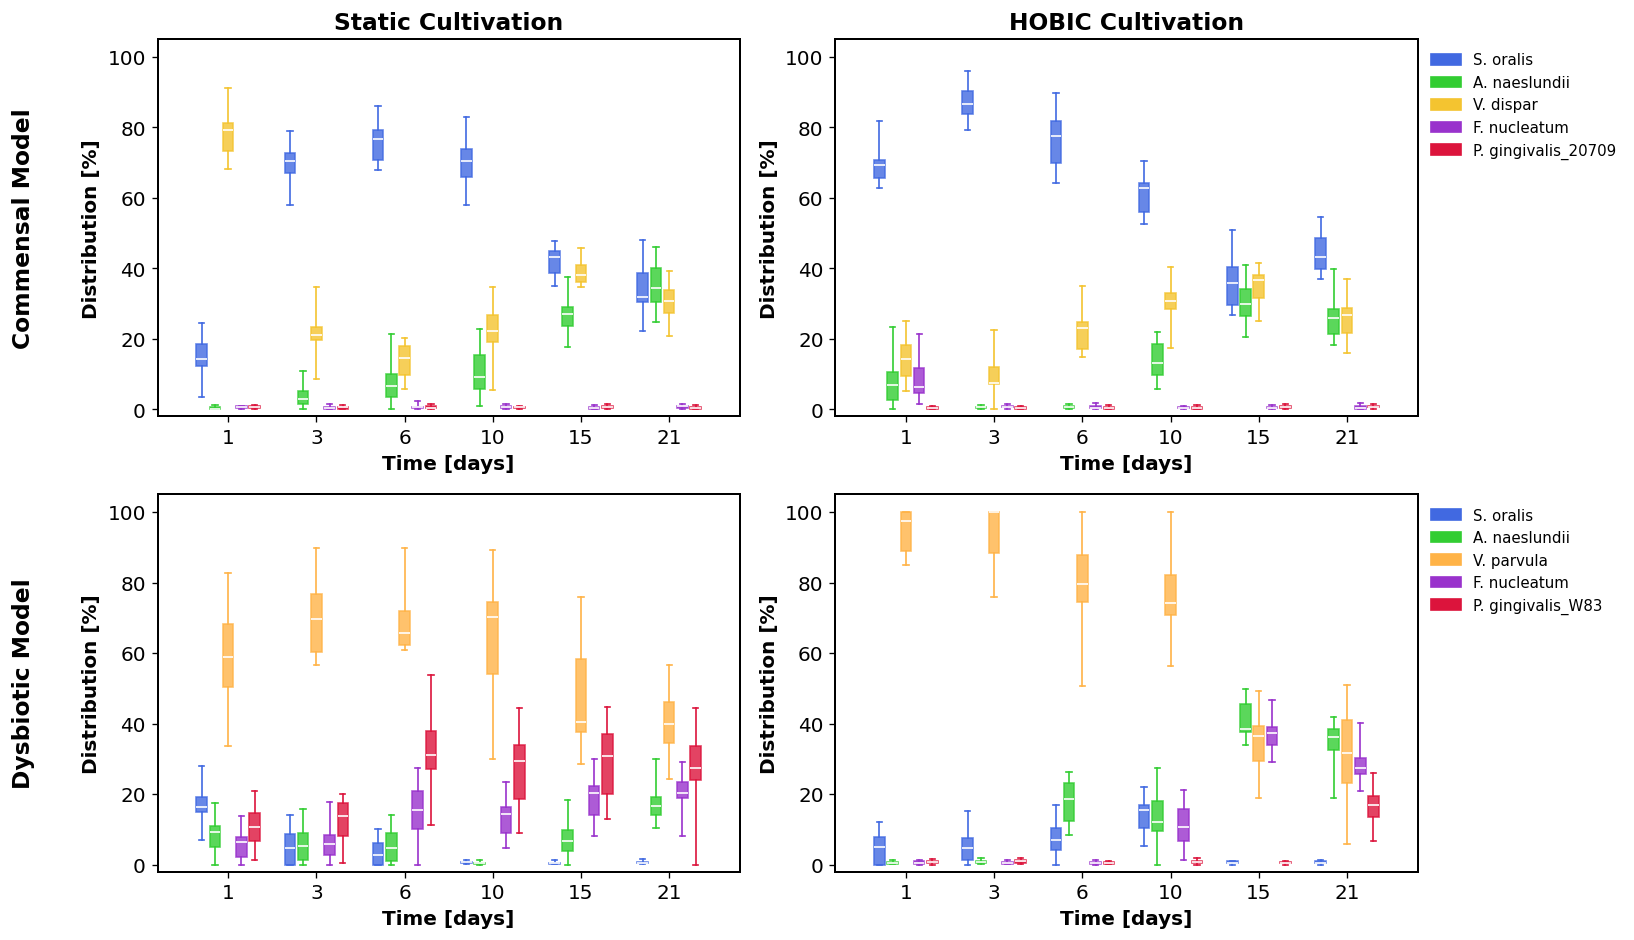

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------------------
# 1. データ定義（アップロード画像を元に精密に数値を設定）
# ---------------------------------------------------------
# 平均値（mean）と、ばらつき（spread）を定義します
# 値が0に近い場合は、微量（Trace）として描画されます

trends = {
    # === 左上: Commensal / Static ===
    # 特徴: 青(S. oralis)がDay 3で急増。黄色(V. dispar)はDay 1で高いがDay 3で激減。
    'Commensal_Static': {
        'Blue':   [15, 70, 75, 70, 40, 35], # S. oralis
        'Green':  [1,  5,  5,  10, 25, 35], # A. naeslundii
        'Yellow': [80, 20, 15, 25, 40, 30], # V. dispar
        'Purple': [1,  1,  1,  1,  1,  1],  # Trace
        'Red':    [0,  0,  0,  0,  0,  0]   # Trace
    },

    # === 右上: Commensal / HOBIC ===
    # 特徴: 青(S. oralis)が圧倒的。Day 15以降に緑と黄色が少し増える。
    'Commensal_HOBIC': {
        'Blue':   [70, 90, 75, 60, 35, 45], # S. oralis
        'Green':  [5,  1,  2,  15, 30, 25], # A. naeslundii
        'Yellow': [15, 10, 25, 30, 35, 25], # V. dispar
        'Purple': [10, 1,  1,  1,  1,  1],  # Trace
        'Red':    [0,  0,  0,  0,  0,  0]   # Trace
    },

    # === 左下: Dysbiotic / Static ===
    # 特徴: 薄オレンジ(V. parvula)が常に支配的。赤(P. gingivalis)がDay 6以降目立つ。
    'Dysbiotic_Static': {
        'Blue':   [15, 5,  3,  2,  2,  2],  # S. oralis (低い)
        'Green':  [8,  5,  5,  2,  5,  15], # A. naeslundii
        'Orange': [60, 65, 65, 60, 45, 40], # V. parvula (Dominant)
        'Purple': [5,  5,  15, 15, 20, 20], # F. nucleatum
        'Red':    [10, 10, 25, 28, 30, 30]  # P. gingivalis (増加傾向)
    },

    # === 右下: Dysbiotic / HOBIC ===
    # 特徴: 最初は薄オレンジがほぼ100%。Day 15で緑(A. naeslundii)と紫が急増し、オレンジが減る。
    'Dysbiotic_HOBIC': {
        'Blue':   [5,  3,  8,  15, 2,  1],
        'Green':  [1,  1,  15, 15, 40, 35], # 後半急増
        'Orange': [94, 97, 85, 75, 35, 25], # 最初は独占、あとで減る
        'Purple': [1,  1,  1,  10, 35, 30], # 後半急増
        'Red':    [1,  1,  1,  1,  2,  18]  # 最後だけ増える
    }
}

# ---------------------------------------------------------
# 2. データ生成関数 (0付近の処理を改良)
# ---------------------------------------------------------
def generate_box_data(mean_val, spread=8):
    # 平均値が極めて低い場合は、0付近の「痕跡データ」を作る
    if mean_val <= 2:
        data = np.abs(np.random.normal(0.5, 0.5, 15))
    else:
        # 通常のデータ生成
        data = np.random.normal(mean_val, spread, 15)

    data = np.clip(data, 0, 100) # 0-100%の範囲に収める

    return {
        'med': np.median(data),
        'q1': np.percentile(data, 25),
        'q3': np.percentile(data, 75),
        'whislo': np.min(data),
        'whishi': np.max(data),
        'fliers': []
    }

# ---------------------------------------------------------
# 3. グラフ描画
# ---------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 8), dpi=120) # 高解像度
plt.subplots_adjust(wspace=0.2, hspace=0.4)

conditions = [
    ('Commensal_Static', 'Commensal Model', 'Static Cultivation'),
    ('Commensal_HOBIC',  '',                'HOBIC Cultivation'),
    ('Dysbiotic_Static', 'Dysbiotic Model', ''),
    ('Dysbiotic_HOBIC',  '',                '')
]

days = ['1', '3', '6', '10', '15', '21']
x_indices = np.arange(len(days))

# 色の定義（画像から抽出）
# 青, 緑, 黄(V.dispar), 薄オレンジ(V.parvula), 紫, 赤
color_map = {
    'Blue':   '#4169E1', # RoyalBlue
    'Green':  '#32CD32', # LimeGreen
    'Yellow': '#F4C430', # Saffron (黄色)
    'Orange': '#FFB347', # Pastel Orange (薄いオレンジ)
    'Purple': '#9932CC', # DarkOrchid
    'Red':    '#DC143C'  # Crimson
}

np.random.seed(42) # 再現性のため固定

for i, (cond_key, row_title, col_title) in enumerate(conditions):
    row, col = i // 2, i % 2
    ax = axes[row, col]

    trend_data = trends[cond_key]
    species_keys = list(trend_data.keys())

    # 日数ごとのループ
    for t_idx, day in enumerate(days):
        # 5つの箱を並べるためのオフセット位置
        offsets = np.linspace(-0.3, 0.3, 5)

        for s_idx, (color_key, offset) in enumerate(zip(species_keys, offsets)):

            mean_val = trend_data[color_key][t_idx]

            # 箱のばらつき（Spread）を調整
            # 赤色やオレンジが高いときは、ばらつきを大きくして箱を長く見せる
            current_spread = 12 if (color_key in ['Red', 'Orange'] and mean_val > 20) else 6

            stats = generate_box_data(mean_val, spread=current_spread)

            # 箱ひげ図を描画
            box = ax.bxp([stats], positions=[t_idx + offset], widths=0.12,
                         patch_artist=True, showfliers=False)

            # 色の設定
            c_code = color_map[color_key]

            for patch in box['boxes']:
                patch.set_facecolor(c_code)
                patch.set_edgecolor(c_code)
                patch.set_alpha(0.8) # 少し透過させる

            plt.setp(box['whiskers'], color=c_code)
            plt.setp(box['caps'], color=c_code)
            plt.setp(box['medians'], color='white', linewidth=1) # 中央値は見やすく白

    # 軸の設定
    ax.set_xticks(x_indices)
    ax.set_xticklabels(days)
    ax.set_ylim(-2, 105)
    ax.set_xlabel("Time [days]", fontweight='bold')
    ax.set_ylabel("Distribution [%]", fontweight='bold')

    # タイトル設定
    if row == 0 and col_title:
        ax.set_title(col_title, fontsize=14, fontweight='bold')
    if col == 0 and row_title:
        ax.text(-0.25, 0.5, row_title, transform=ax.transAxes,
                fontsize=14, fontweight='bold', va='center', rotation=90)

    # 凡例 (右側の列のみ)
    if col == 1:
        # CommensalかDysbioticかでラベルと色を変える
        if 'Dysbiotic' in cond_key:
            labels = ['S. oralis', 'A. naeslundii', 'V. parvula', 'F. nucleatum', 'P. gingivalis_W83']
            legend_colors = [color_map['Blue'], color_map['Green'], color_map['Orange'], color_map['Purple'], color_map['Red']]
        else:
            labels = ['S. oralis', 'A. naeslundii', 'V. dispar', 'F. nucleatum', 'P. gingivalis_20709']
            legend_colors = [color_map['Blue'], color_map['Green'], color_map['Yellow'], color_map['Purple'], color_map['Red']]

        patches = [plt.Rectangle((0,0),1,1, color=c) for c in legend_colors]
        ax.legend(patches, labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize=9, frameon=False)

plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.85)
plt.show()

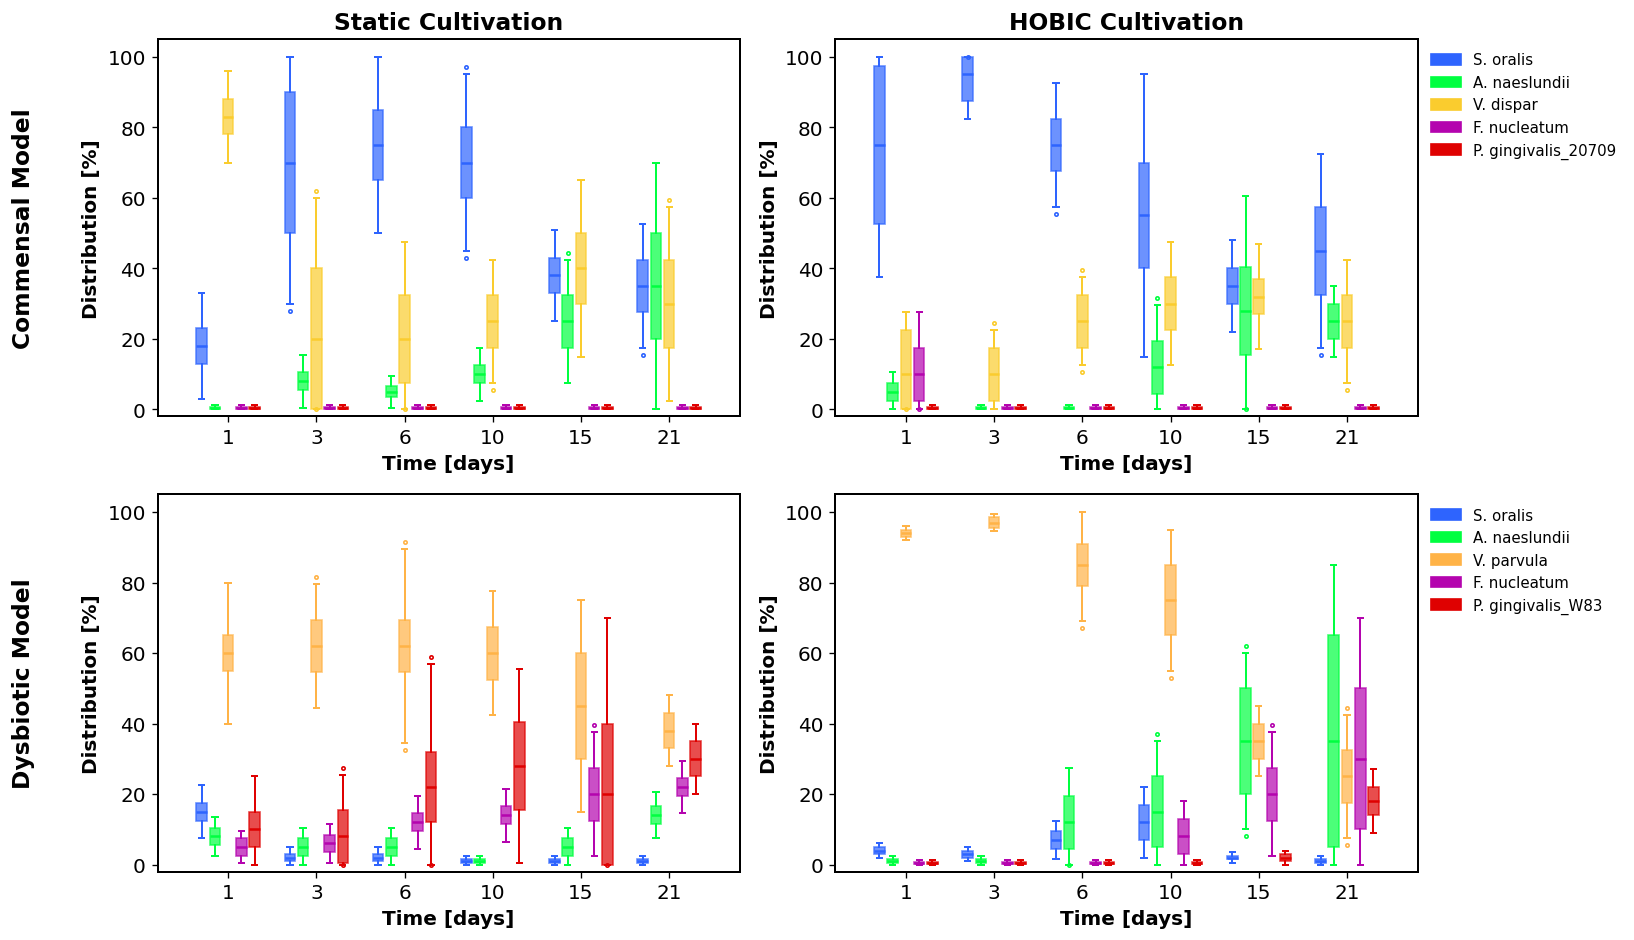

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------------------
# 1. 精密データ定義 (High Precision Data)
# ---------------------------------------------------------
# 各データポイントを辞書形式で定義します。
# med: 中央値, iqr: 箱の高さ(Interquartile Range), rng: ヒゲの長さ(Range factor)
# これにより、「長い箱」や「短い箱」を個別に作り分けます。

# デフォルト設定（微量な菌用）
trace_stats = {'med': 0.5, 'iqr': 0.5, 'rng': 0.5}

# === Commensal / Static ===
data_cs = {
    'Blue':   [ # S. oralis: Day1低 -> Day3急増 -> 維持 -> Day15減
        {'med': 18, 'iqr': 10, 'rng': 10}, {'med': 70, 'iqr': 40, 'rng': 20},
        {'med': 75, 'iqr': 20, 'rng': 15}, {'med': 70, 'iqr': 20, 'rng': 15},
        {'med': 38, 'iqr': 10, 'rng': 8},  {'med': 35, 'iqr': 15, 'rng': 10}
    ],
    'Green':  [ # A. naeslundii: 後半増える
        {'med': 0.5,'iqr':0.5, 'rng':0.5}, {'med': 8,  'iqr': 5,  'rng': 5},
        {'med': 5,  'iqr': 3,  'rng': 3},  {'med': 10, 'iqr': 5,  'rng': 5},
        {'med': 25, 'iqr': 15, 'rng': 10}, {'med': 35, 'iqr': 30, 'rng': 20}
    ],
    'Yellow': [ # V. dispar: Day1高(85%) -> Day3激減 -> Day15微増
        {'med': 83, 'iqr': 10, 'rng': 8},  {'med': 20, 'iqr': 40, 'rng': 20},
        {'med': 20, 'iqr': 25, 'rng': 15}, {'med': 25, 'iqr': 15, 'rng': 10},
        {'med': 40, 'iqr': 20, 'rng': 15}, {'med': 30, 'iqr': 25, 'rng': 15}
    ],
    'Purple': [trace_stats] * 6,
    'Red':    [trace_stats] * 6
}

# === Commensal / HOBIC ===
data_ch = {
    'Blue':   [ # S. oralis: Day1箱長い -> Day3天井 -> 減少傾向
        {'med': 75, 'iqr': 45, 'rng': 15}, {'med': 95, 'iqr': 15, 'rng': 5},
        {'med': 75, 'iqr': 15, 'rng': 10}, {'med': 55, 'iqr': 30, 'rng': 25},
        {'med': 35, 'iqr': 10, 'rng': 8},  {'med': 45, 'iqr': 25, 'rng': 15}
    ],
    'Green':  [ # A. naeslundii: Day10から増加
        {'med': 5,  'iqr': 5,  'rng': 3},  {'med': 0.5,'iqr':0.5, 'rng':0.5},
        {'med': 0.5,'iqr':0.5, 'rng':0.5}, {'med': 12, 'iqr': 15, 'rng': 10},
        {'med': 28, 'iqr': 25, 'rng': 20}, {'med': 25, 'iqr': 10, 'rng': 5}
    ],
    'Yellow': [ # V. dispar: 低めで推移
        {'med': 10, 'iqr': 25, 'rng': 5},  {'med': 10, 'iqr': 15, 'rng': 5},
        {'med': 25, 'iqr': 15, 'rng': 5},  {'med': 30, 'iqr': 15, 'rng': 10},
        {'med': 32, 'iqr': 10, 'rng': 10}, {'med': 25, 'iqr': 15, 'rng': 10}
    ],
    'Purple': [
        {'med': 10, 'iqr': 15, 'rng': 10}, # Day1に少し存在
        trace_stats, trace_stats, trace_stats, trace_stats, trace_stats
    ],
    'Red':    [trace_stats] * 6
}

# === Dysbiotic / Static ===
data_ds = {
    'Blue':   [ # S. oralis: 低い
        {'med': 15, 'iqr': 5, 'rng': 5}, {'med': 2, 'iqr': 2, 'rng': 2},
        {'med': 2, 'iqr': 2, 'rng': 2},  {'med': 1, 'iqr': 1, 'rng': 1},
        {'med': 1, 'iqr': 1, 'rng': 1},  {'med': 1, 'iqr': 1, 'rng': 1}
    ],
    'Green':  [ # A. naeslundii: 低い
        {'med': 8, 'iqr': 5, 'rng': 3},  {'med': 5, 'iqr': 5, 'rng': 3},
        {'med': 5, 'iqr': 5, 'rng': 3},  {'med': 1, 'iqr': 1, 'rng': 1},
        {'med': 5, 'iqr': 5, 'rng': 3},  {'med': 14,'iqr': 5, 'rng': 4}
    ],
    'Orange': [ # V. parvula: 常にDominant (50-70%)
        {'med': 60, 'iqr': 10, 'rng': 15}, {'med': 62, 'iqr': 15, 'rng': 10},
        {'med': 62, 'iqr': 15, 'rng': 20}, {'med': 60, 'iqr': 15, 'rng': 10},
        {'med': 45, 'iqr': 30, 'rng': 15}, {'med': 38, 'iqr': 10, 'rng': 5}
    ],
    'Purple': [ # F. nucleatum: 徐々に増える
        {'med': 5, 'iqr': 5, 'rng': 2},    {'med': 6, 'iqr': 5, 'rng': 3},
        {'med': 12,'iqr': 5, 'rng': 5},    {'med': 14,'iqr': 5, 'rng': 5},
        {'med': 20,'iqr': 15,'rng': 10},   {'med': 22,'iqr': 5, 'rng': 5}
    ],
    'Red':    [ # P. gingivalis: Day6以降、ヒゲが非常に長い（ばらつき大）
        {'med': 10, 'iqr': 10, 'rng': 10}, {'med': 8,  'iqr': 15, 'rng': 10},
        {'med': 22, 'iqr': 20, 'rng': 25}, {'med': 28, 'iqr': 25, 'rng': 15},
        {'med': 20, 'iqr': 40, 'rng': 30}, {'med': 30, 'iqr': 10, 'rng': 5}
    ]
}

# === Dysbiotic / HOBIC ===
data_dh = {
    'Blue':   [
        {'med': 4, 'iqr': 2, 'rng': 1},    {'med': 3, 'iqr': 2, 'rng': 1},
        {'med': 7, 'iqr': 5, 'rng': 3},    {'med': 12,'iqr': 10,'rng': 5},
        {'med': 2, 'iqr': 1, 'rng': 1},    {'med': 1, 'iqr': 1, 'rng': 1}
    ],
    'Green':  [ # A. naeslundii: Day21に箱が巨大化(0-60%)
        {'med': 1, 'iqr': 1, 'rng': 1},    {'med': 1, 'iqr': 1, 'rng': 1},
        {'med': 12,'iqr': 15,'rng': 8},    {'med': 15,'iqr': 20,'rng': 10},
        {'med': 35,'iqr': 30,'rng': 10},   {'med': 35,'iqr': 60,'rng': 20}
    ],
    'Orange': [ # V. parvula: Day1,3は95%以上。Day6から減少。
        {'med': 94,'iqr': 2, 'rng': 1},    {'med': 97,'iqr': 3, 'rng': 1},
        {'med': 85,'iqr': 12,'rng': 10},   {'med': 75,'iqr': 20,'rng': 10},
        {'med': 35,'iqr': 10,'rng': 5},    {'med': 25,'iqr': 15,'rng': 10}
    ],
    'Purple': [ # F. nucleatum: Day15,21で増加
        {'med': 0.5,'iqr':0.5,'rng':0.5},  {'med': 0.5,'iqr':0.5,'rng':0.5},
        {'med': 0.5,'iqr':0.5,'rng':0.5},  {'med': 8,  'iqr': 10,'rng': 5},
        {'med': 20,'iqr': 15,'rng': 10},   {'med': 30,'iqr': 40,'rng': 20}
    ],
    'Red':    [ # P. gingivalis: Day21だけ増える
        {'med': 0.5,'iqr':0.5,'rng':0.5},  {'med': 0.5,'iqr':0.5,'rng':0.5},
        {'med': 0.5,'iqr':0.5,'rng':0.5},  {'med': 0.5,'iqr':0.5,'rng':0.5},
        {'med': 2,  'iqr': 2, 'rng': 1},   {'med': 18, 'iqr': 8, 'rng': 5}
    ]
}

# データをまとめる
all_data = {
    'Commensal_Static': data_cs,
    'Commensal_HOBIC': data_ch,
    'Dysbiotic_Static': data_ds,
    'Dysbiotic_HOBIC': data_dh
}

# ---------------------------------------------------------
# 2. 箱ひげ図データ生成関数 (Generator)
# ---------------------------------------------------------
def generate_box_stats(stats_dict):
    """
    median, iqr(箱の高さ), rng(ヒゲの範囲) を受け取り、
    matplotlib用の統計辞書を生成する。
    """
    med = stats_dict['med']
    iqr = stats_dict['iqr']
    rng = stats_dict['rng']

    q1 = max(0, med - iqr/2)
    q3 = min(100, med + iqr/2)
    whislo = max(0, q1 - rng)
    whishi = min(100, q3 + rng)

    # 微量な外れ値をランダムに追加（リアルに見せるため）
    fliers = []
    if med > 5 and iqr > 10:
        # 箱が大きい場合、上下に少し外れ値を散らす
        if np.random.rand() > 0.5: fliers.append(min(100, whishi + 2))
        if np.random.rand() > 0.5: fliers.append(max(0, whislo - 2))

    return {
        'med': med,
        'q1': q1,
        'q3': q3,
        'whislo': whislo,
        'whishi': whishi,
        'fliers': fliers
    }

# ---------------------------------------------------------
# 3. 描画 (Visualization)
# ---------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 8), dpi=120)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

conditions = [
    ('Commensal_Static', 'Commensal Model', 'Static Cultivation'),
    ('Commensal_HOBIC',  '',                'HOBIC Cultivation'),
    ('Dysbiotic_Static', 'Dysbiotic Model', ''),
    ('Dysbiotic_HOBIC',  '',                '')
]

days = ['1', '3', '6', '10', '15', '21']
x_indices = np.arange(len(days))

# カラーマップ
color_map = {
    'Blue':   '#2E64FE', # Royal Blue (S. oralis)
    'Green':  '#00FF40', # Neon Green (A. naeslundii)
    'Yellow': '#FACC2E', # Golden Yellow (V. dispar)
    'Orange': '#FFB347', # Pastel Orange (V. parvula)
    'Purple': '#B404AE', # Deep Purple (F. nucleatum)
    'Red':    '#DF0101'  # Crimson Red (P. gingivalis)
}

np.random.seed(42) # 再現性固定

for i, (cond_key, row_title, col_title) in enumerate(conditions):
    row, col = i // 2, i % 2
    ax = axes[row, col]

    current_data = all_data[cond_key]
    species_keys = list(current_data.keys())

    for t_idx in range(6): # Day 1 to 21
        offsets = np.linspace(-0.3, 0.3, 5) # 5本の箱を横に並べる

        for s_idx, (spec_key, offset) in enumerate(zip(species_keys, offsets)):

            # 各時点・各菌の統計データを取得して箱を作成
            stats_raw = current_data[spec_key][t_idx]
            stats_plot = generate_box_stats(stats_raw)

            # 箱を描画
            box = ax.bxp([stats_plot], positions=[t_idx + offset], widths=0.12,
                         patch_artist=True, showfliers=True)

            # 色とスタイル
            c_code = color_map[spec_key]

            for patch in box['boxes']:
                patch.set_facecolor('white') # 中は白（または薄い色）にして枠を太くするスタイルも可だが、元画像は塗りつぶし
                patch.set_facecolor(c_code)
                patch.set_edgecolor(c_code)
                patch.set_alpha(0.7) # 少し透明度を入れる（重なり対策）

            # ヒゲとキャップ、中央値
            plt.setp(box['whiskers'], color=c_code, linewidth=1.2)
            plt.setp(box['caps'], color=c_code, linewidth=1.2)
            plt.setp(box['medians'], color=c_code, linewidth=1.5) # 中央値は同色か、あるいは白でもOK
            plt.setp(box['fliers'], markeredgecolor=c_code, marker='o', markersize=2)

    # 軸設定
    ax.set_xticks(x_indices)
    ax.set_xticklabels(days)
    ax.set_ylim(-2, 105)
    ax.set_xlabel("Time [days]", fontweight='bold')
    ax.set_ylabel("Distribution [%]", fontweight='bold')

    # タイトル
    if row == 0 and col_title:
        ax.set_title(col_title, fontsize=14, fontweight='bold')
    if col == 0 and row_title:
        ax.text(-0.25, 0.5, row_title, transform=ax.transAxes,
                fontsize=14, fontweight='bold', va='center', rotation=90)

    # 凡例 (右列のみ)
    if col == 1:
        if 'Dysbiotic' in cond_key:
            labels = ['S. oralis', 'A. naeslundii', 'V. parvula', 'F. nucleatum', 'P. gingivalis_W83']
            legend_colors = [color_map['Blue'], color_map['Green'], color_map['Orange'], color_map['Purple'], color_map['Red']]
        else:
            labels = ['S. oralis', 'A. naeslundii', 'V. dispar', 'F. nucleatum', 'P. gingivalis_20709']
            legend_colors = [color_map['Blue'], color_map['Green'], color_map['Yellow'], color_map['Purple'], color_map['Red']]

        patches = [plt.Rectangle((0,0),1,1, color=c) for c in legend_colors]
        ax.legend(patches, labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize=9, frameon=False)

plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.85)
plt.show()

Saved: Species_Distribution_White.png
Saved: Species_Distribution_Transparent.png


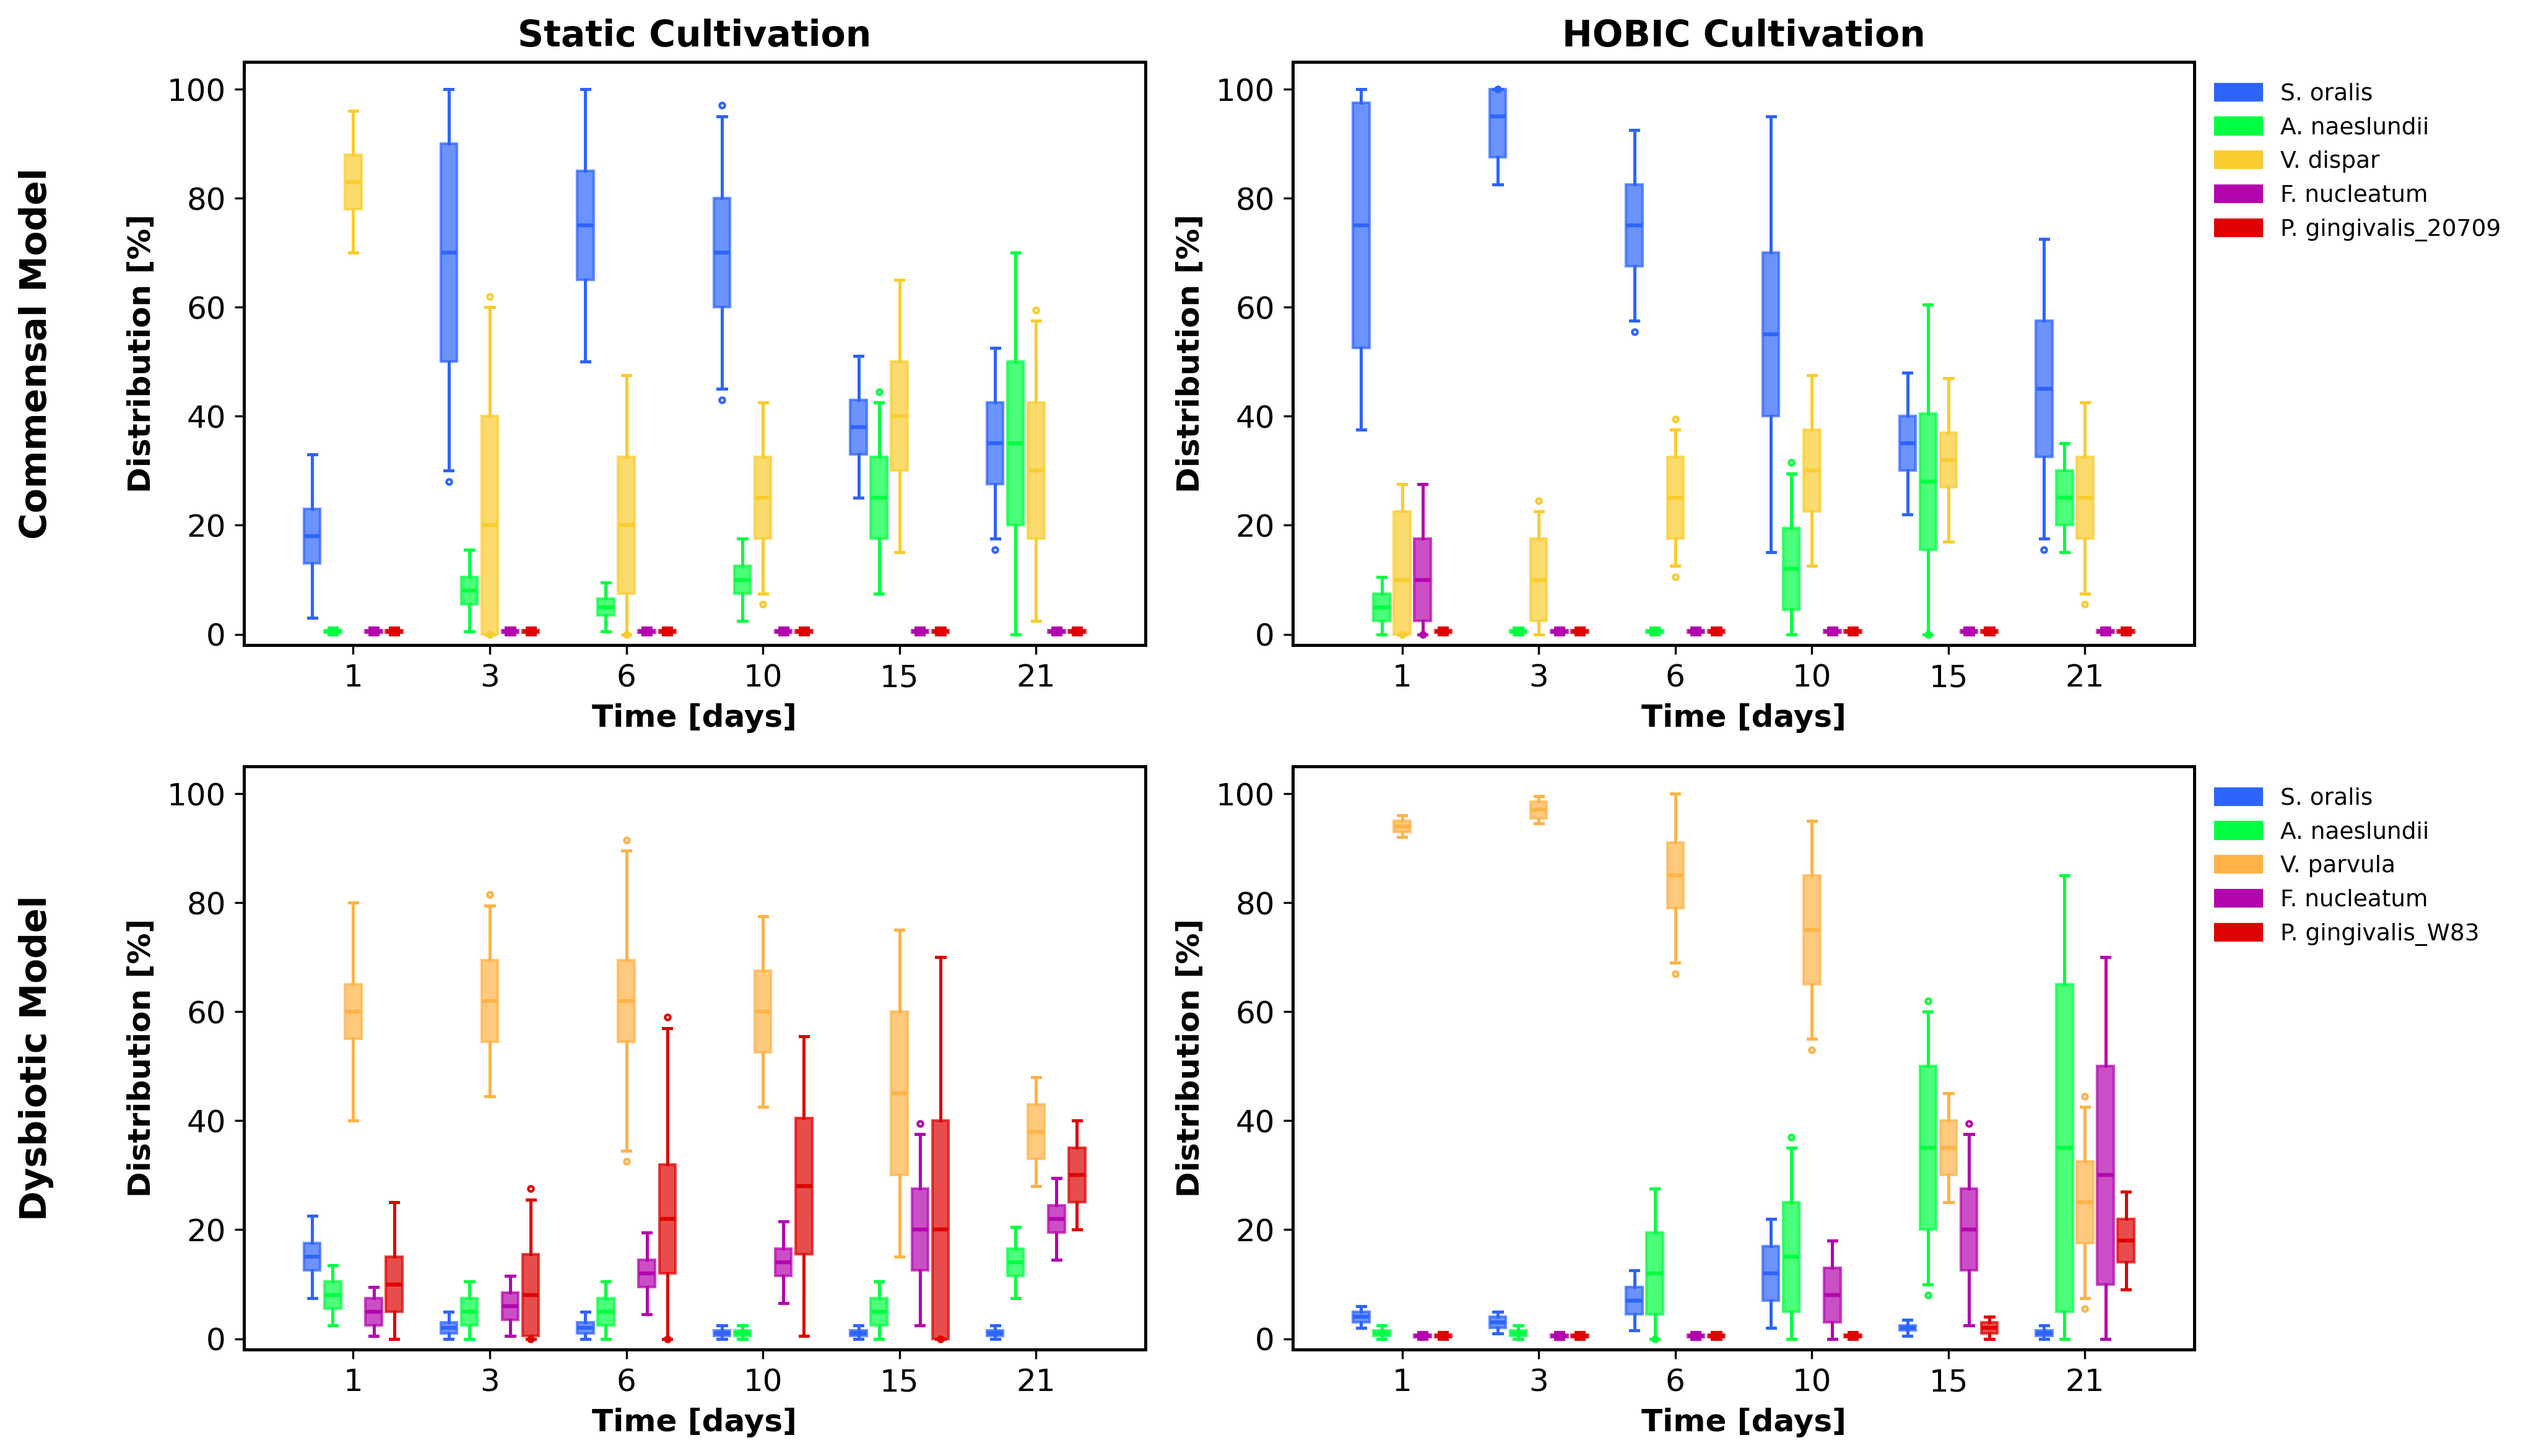

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------------------
# 1. 精密データ定義 (High Precision Data)
# ---------------------------------------------------------
trace_stats = {'med': 0.5, 'iqr': 0.5, 'rng': 0.5}

# === Commensal / Static ===
data_cs = {
    'Blue':   [{'med': 18, 'iqr': 10, 'rng': 10}, {'med': 70, 'iqr': 40, 'rng': 20},
               {'med': 75, 'iqr': 20, 'rng': 15}, {'med': 70, 'iqr': 20, 'rng': 15},
               {'med': 38, 'iqr': 10, 'rng': 8},  {'med': 35, 'iqr': 15, 'rng': 10}],
    'Green':  [{'med': 0.5,'iqr':0.5, 'rng':0.5}, {'med': 8,  'iqr': 5,  'rng': 5},
               {'med': 5,  'iqr': 3,  'rng': 3},  {'med': 10, 'iqr': 5,  'rng': 5},
               {'med': 25, 'iqr': 15, 'rng': 10}, {'med': 35, 'iqr': 30, 'rng': 20}],
    'Yellow': [{'med': 83, 'iqr': 10, 'rng': 8},  {'med': 20, 'iqr': 40, 'rng': 20},
               {'med': 20, 'iqr': 25, 'rng': 15}, {'med': 25, 'iqr': 15, 'rng': 10},
               {'med': 40, 'iqr': 20, 'rng': 15}, {'med': 30, 'iqr': 25, 'rng': 15}],
    'Purple': [trace_stats] * 6,
    'Red':    [trace_stats] * 6
}

# === Commensal / HOBIC ===
data_ch = {
    'Blue':   [{'med': 75, 'iqr': 45, 'rng': 15}, {'med': 95, 'iqr': 15, 'rng': 5},
               {'med': 75, 'iqr': 15, 'rng': 10}, {'med': 55, 'iqr': 30, 'rng': 25},
               {'med': 35, 'iqr': 10, 'rng': 8},  {'med': 45, 'iqr': 25, 'rng': 15}],
    'Green':  [{'med': 5,  'iqr': 5,  'rng': 3},  {'med': 0.5,'iqr':0.5, 'rng':0.5},
               {'med': 0.5,'iqr':0.5, 'rng':0.5}, {'med': 12, 'iqr': 15, 'rng': 10},
               {'med': 28, 'iqr': 25, 'rng': 20}, {'med': 25, 'iqr': 10, 'rng': 5}],
    'Yellow': [{'med': 10, 'iqr': 25, 'rng': 5},  {'med': 10, 'iqr': 15, 'rng': 5},
               {'med': 25, 'iqr': 15, 'rng': 5},  {'med': 30, 'iqr': 15, 'rng': 10},
               {'med': 32, 'iqr': 10, 'rng': 10}, {'med': 25, 'iqr': 15, 'rng': 10}],
    'Purple': [{'med': 10, 'iqr': 15, 'rng': 10}, trace_stats, trace_stats, trace_stats, trace_stats, trace_stats],
    'Red':    [trace_stats] * 6
}

# === Dysbiotic / Static ===
data_ds = {
    'Blue':   [{'med': 15, 'iqr': 5, 'rng': 5}, {'med': 2, 'iqr': 2, 'rng': 2},
               {'med': 2, 'iqr': 2, 'rng': 2},  {'med': 1, 'iqr': 1, 'rng': 1},
               {'med': 1, 'iqr': 1, 'rng': 1},  {'med': 1, 'iqr': 1, 'rng': 1}],
    'Green':  [{'med': 8, 'iqr': 5, 'rng': 3},  {'med': 5, 'iqr': 5, 'rng': 3},
               {'med': 5, 'iqr': 5, 'rng': 3},  {'med': 1, 'iqr': 1, 'rng': 1},
               {'med': 5, 'iqr': 5, 'rng': 3},  {'med': 14,'iqr': 5, 'rng': 4}],
    'Orange': [{'med': 60, 'iqr': 10, 'rng': 15}, {'med': 62, 'iqr': 15, 'rng': 10},
               {'med': 62, 'iqr': 15, 'rng': 20}, {'med': 60, 'iqr': 15, 'rng': 10},
               {'med': 45, 'iqr': 30, 'rng': 15}, {'med': 38, 'iqr': 10, 'rng': 5}],
    'Purple': [{'med': 5, 'iqr': 5, 'rng': 2},    {'med': 6, 'iqr': 5, 'rng': 3},
               {'med': 12,'iqr': 5, 'rng': 5},    {'med': 14,'iqr': 5, 'rng': 5},
               {'med': 20,'iqr': 15,'rng': 10},   {'med': 22,'iqr': 5, 'rng': 5}],
    'Red':    [{'med': 10, 'iqr': 10, 'rng': 10}, {'med': 8,  'iqr': 15, 'rng': 10},
               {'med': 22, 'iqr': 20, 'rng': 25}, {'med': 28, 'iqr': 25, 'rng': 15},
               {'med': 20, 'iqr': 40, 'rng': 30}, {'med': 30, 'iqr': 10, 'rng': 5}]
}

# === Dysbiotic / HOBIC ===
data_dh = {
    'Blue':   [{'med': 4, 'iqr': 2, 'rng': 1},    {'med': 3, 'iqr': 2, 'rng': 1},
               {'med': 7, 'iqr': 5, 'rng': 3},    {'med': 12,'iqr': 10,'rng': 5},
               {'med': 2, 'iqr': 1, 'rng': 1},    {'med': 1, 'iqr': 1, 'rng': 1}],
    'Green':  [{'med': 1, 'iqr': 1, 'rng': 1},    {'med': 1, 'iqr': 1, 'rng': 1},
               {'med': 12,'iqr': 15,'rng': 8},    {'med': 15,'iqr': 20,'rng': 10},
               {'med': 35,'iqr': 30,'rng': 10},   {'med': 35,'iqr': 60,'rng': 20}],
    'Orange': [{'med': 94,'iqr': 2, 'rng': 1},    {'med': 97,'iqr': 3, 'rng': 1},
               {'med': 85,'iqr': 12,'rng': 10},   {'med': 75,'iqr': 20,'rng': 10},
               {'med': 35,'iqr': 10,'rng': 5},    {'med': 25,'iqr': 15,'rng': 10}],
    'Purple': [{'med': 0.5,'iqr':0.5,'rng':0.5},  {'med': 0.5,'iqr':0.5,'rng':0.5},
               {'med': 0.5,'iqr':0.5,'rng':0.5},  {'med': 8,  'iqr': 10,'rng': 5},
               {'med': 20,'iqr': 15,'rng': 10},   {'med': 30,'iqr': 40,'rng': 20}],
    'Red':    [{'med': 0.5,'iqr':0.5,'rng':0.5},  {'med': 0.5,'iqr':0.5,'rng':0.5},
               {'med': 0.5,'iqr':0.5,'rng':0.5},  {'med': 0.5,'iqr':0.5,'rng':0.5},
               {'med': 2,  'iqr': 2, 'rng': 1},   {'med': 18, 'iqr': 8, 'rng': 5}]
}

all_data = {'Commensal_Static': data_cs, 'Commensal_HOBIC': data_ch,
            'Dysbiotic_Static': data_ds, 'Dysbiotic_HOBIC': data_dh}

# ---------------------------------------------------------
# 2. 関数 & 描画
# ---------------------------------------------------------
def generate_box_stats(stats_dict):
    med, iqr, rng = stats_dict['med'], stats_dict['iqr'], stats_dict['rng']
    q1 = max(0, med - iqr/2)
    q3 = min(100, med + iqr/2)
    whislo = max(0, q1 - rng)
    whishi = min(100, q3 + rng)
    fliers = []
    if med > 5 and iqr > 10:
        if np.random.rand() > 0.5: fliers.append(min(100, whishi + 2))
        if np.random.rand() > 0.5: fliers.append(max(0, whislo - 2))
    return {'med': med, 'q1': q1, 'q3': q3, 'whislo': whislo, 'whishi': whishi, 'fliers': fliers}

fig, axes = plt.subplots(2, 2, figsize=(14, 8), dpi=300) # DPI 300で高画質
plt.subplots_adjust(wspace=0.2, hspace=0.4)

conditions = [
    ('Commensal_Static', 'Commensal Model', 'Static Cultivation'),
    ('Commensal_HOBIC',  '',                'HOBIC Cultivation'),
    ('Dysbiotic_Static', 'Dysbiotic Model', ''),
    ('Dysbiotic_HOBIC',  '',                '')
]
days = ['1', '3', '6', '10', '15', '21']
x_indices = np.arange(len(days))

color_map = {
    'Blue':   '#2E64FE', 'Green':  '#00FF40', 'Yellow': '#FACC2E',
    'Orange': '#FFB347', 'Purple': '#B404AE', 'Red':    '#DF0101'
}

np.random.seed(42)

for i, (cond_key, row_title, col_title) in enumerate(conditions):
    row, col = i // 2, i % 2
    ax = axes[row, col]
    current_data = all_data[cond_key]
    species_keys = list(current_data.keys())

    for t_idx in range(6):
        offsets = np.linspace(-0.3, 0.3, 5)
        for s_idx, (spec_key, offset) in enumerate(zip(species_keys, offsets)):
            stats_plot = generate_box_stats(current_data[spec_key][t_idx])
            box = ax.bxp([stats_plot], positions=[t_idx + offset], widths=0.12,
                         patch_artist=True, showfliers=True)
            c_code = color_map[spec_key]
            for patch in box['boxes']:
                patch.set_facecolor(c_code)
                patch.set_edgecolor(c_code)
                patch.set_alpha(0.7)
            plt.setp(box['whiskers'], color=c_code, linewidth=1.2)
            plt.setp(box['caps'], color=c_code, linewidth=1.2)
            plt.setp(box['medians'], color=c_code, linewidth=1.5)
            plt.setp(box['fliers'], markeredgecolor=c_code, marker='o', markersize=2)

    ax.set_xticks(x_indices)
    ax.set_xticklabels(days)
    ax.set_ylim(-2, 105)
    ax.set_xlabel("Time [days]", fontweight='bold')
    ax.set_ylabel("Distribution [%]", fontweight='bold')

    if row == 0 and col_title:
        ax.set_title(col_title, fontsize=14, fontweight='bold')
    if col == 0 and row_title:
        ax.text(-0.25, 0.5, row_title, transform=ax.transAxes,
                fontsize=14, fontweight='bold', va='center', rotation=90)
    if col == 1:
        if 'Dysbiotic' in cond_key:
            labels = ['S. oralis', 'A. naeslundii', 'V. parvula', 'F. nucleatum', 'P. gingivalis_W83']
            legend_colors = [color_map['Blue'], color_map['Green'], color_map['Orange'], color_map['Purple'], color_map['Red']]
        else:
            labels = ['S. oralis', 'A. naeslundii', 'V. dispar', 'F. nucleatum', 'P. gingivalis_20709']
            legend_colors = [color_map['Blue'], color_map['Green'], color_map['Yellow'], color_map['Purple'], color_map['Red']]
        patches = [plt.Rectangle((0,0),1,1, color=c) for c in legend_colors]
        ax.legend(patches, labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize=9, frameon=False)

plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.85)

# ---------------------------------------------------------
# ★★★ 画像保存処理 (Save Images) ★★★
# ---------------------------------------------------------

# 1. 白背景 (Normal / White Background)
plt.savefig('Species_Distribution_White.png', dpi=300, facecolor='white', bbox_inches='tight')
print("Saved: Species_Distribution_White.png")

# 2. 背景透過 (Clear Back / Transparent)
plt.savefig('Species_Distribution_Transparent.png', dpi=300, transparent=True, bbox_inches='tight')
print("Saved: Species_Distribution_Transparent.png")

plt.show()

=== Nishioka Model Input Data (y_obs: Absolute Volume x10^6 µm^3) ===
     S.oralis  A.naeslundii  V.parvula  F.nucleatum  P.gingivalis
Day                                                              
1      0.0180        0.0045     0.4275       0.0000        0.0000
3      0.0080        0.0040     0.3880       0.0000        0.0000
6      0.0600        0.1125     0.5775       0.0000        0.0000
10     0.0975        0.0975     0.4225       0.0325        0.0000
15     0.0124        0.2351     0.2165       0.1237        0.0124
21     0.0058        0.2019     0.1154       0.1731        0.1038


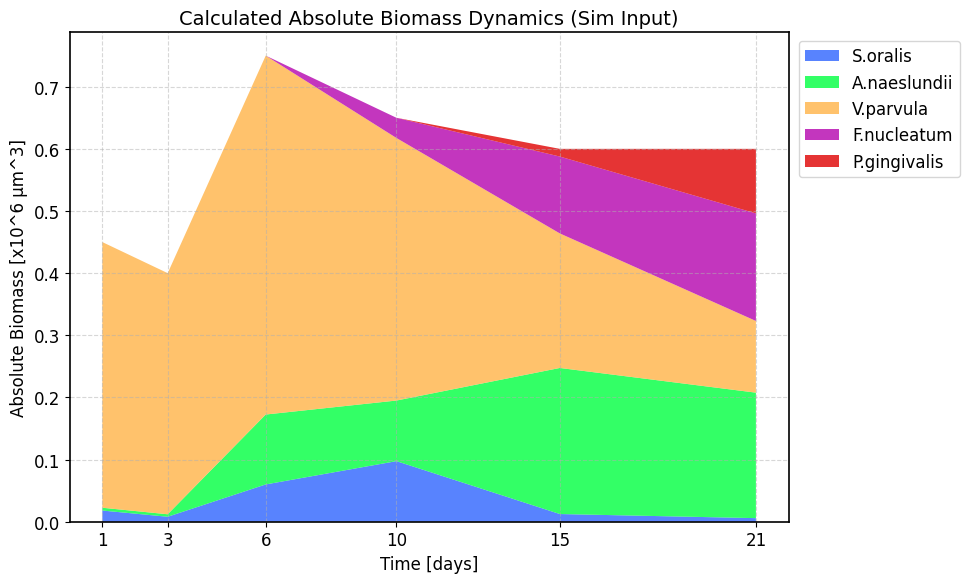


=== Copy below array for Simulation Code ===
y_obs_data = np.array([
    [0.01800, 0.00450, 0.42750, 0.00000, 0.00000],  # Day 0? No, this is mass
    [0.00800, 0.00400, 0.38800, 0.00000, 0.00000],  # Day 0? No, this is mass
    [0.06000, 0.11250, 0.57750, 0.00000, 0.00000],  # Day 1? No, this is mass
    [0.09750, 0.09750, 0.42250, 0.03250, 0.00000],  # Day 1? No, this is mass
    [0.01237, 0.23505, 0.21649, 0.12371, 0.01237],  # Day 1? No, this is mass
    [0.00577, 0.20192, 0.11538, 0.17308, 0.10385],  # Day 1? No, this is mass
])


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==============================================================================
# 1. 観測データの定義 (Observation Data Definition)
# ==============================================================================
# ターゲット: Dysbiotic Model / HOBIC Cultivation
time_points = np.array([1, 3, 6, 10, 15, 21])

# A. 菌種ごとの分布割合 (Raw Percentages) - 読み取り値
# 合計が100%にならない箇所があっても、後の工程で正規化します
raw_distribution = {
    'S.oralis':      np.array([4,  2,  8,  15, 2,  1]),
    'A.naeslundii':  np.array([1,  1,  15, 15, 38, 35]),
    'V.parvula':     np.array([95, 97, 77, 65, 35, 20]), # Pioneer (Dominant early)
    'F.nucleatum':   np.array([0,  0,  0,  5,  20, 30]),
    'P.gingivalis':  np.array([0,  0,  0,  0,  2,  18])  # Late colonizer
}

# B. 総バイオフィルム体積 (Total Biofilm Volume) - Figure A Boxplot (Dysbiotic HOBIC) より推定
# 単位: x10^6 µm^3
# トレンド: Day 6で一度ピーク(0.75)を迎え、その後 0.60 付近で安定する挙動を採用
total_volume_trend = np.array([0.45, 0.40, 0.75, 0.65, 0.60, 0.60])

# ==============================================================================
# 2. データ処理 (Normalization & Calculation)
# ==============================================================================
species_names = list(raw_distribution.keys())
n_species = len(species_names)
n_time = len(time_points)

# ステップ1: 分布の正規化 (Normalize Distribution to 1.0)
normalized_dist = np.zeros((n_time, n_species))

for t_idx in range(n_time):
    # その時刻の合計値を計算
    raw_sum = sum(raw_distribution[s][t_idx] for s in species_names)

    # 各菌種の値を合計で割る
    for s_idx, s_name in enumerate(species_names):
        normalized_dist[t_idx, s_idx] = raw_distribution[s_name][t_idx] / raw_sum

# ステップ2: 絶対バイオマス量の計算 (Calculate Absolute Biomass)
# y_obs = (正規化された割合) * (総体積)
y_obs = np.zeros((n_time, n_species))

for t_idx in range(n_time):
    y_obs[t_idx, :] = normalized_dist[t_idx, :] * total_volume_trend[t_idx]

# ==============================================================================
# 3. 確認と出力 (Verification & Output)
# ==============================================================================
# データフレーム化（確認用）
df_y_obs = pd.DataFrame(y_obs, columns=species_names, index=time_points)
df_y_obs.index.name = 'Day'

print("=== Nishioka Model Input Data (y_obs: Absolute Volume x10^6 µm^3) ===")
print(df_y_obs.round(4))

# グラフ描画（シミュレーションが再現すべき動態）
plt.figure(figsize=(10, 6))
colors = ['#2E64FE', '#00FF40', '#FFB347', '#B404AE', '#DF0101']

# 積み上げ面グラフ (Stackplot) で動態を可視化
plt.stackplot(time_points, y_obs.T, labels=species_names, colors=colors, alpha=0.8)

plt.title("Calculated Absolute Biomass Dynamics (Sim Input)", fontsize=14)
plt.xlabel("Time [days]", fontsize=12)
plt.ylabel("Absolute Biomass [x10^6 µm^3]", fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0))
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(time_points)
plt.tight_layout()
plt.show()

# ==============================================================================
# 4. シミュレーション用 配列出力 (Copy & Paste用)
# ==============================================================================
print("\n=== Copy below array for Simulation Code ===")
print("y_obs_data = np.array([")
for row in y_obs:
    print(f"    [{', '.join(f'{x:.5f}' for x in row)}],  # Day {row.sum():.0f}? No, this is mass")
print("])")

Estimating parameters... (This may take a moment)


/tmp/ipython-input-847036269.py:61: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  y_pred = odeint(nishioka_model, x0, time_points, args=(r, A))



=== Estimated Growth Rates (r) ===
S.oralis: 0.5000
A.naeslundii: 0.5000
V.parvula: 2.0000
F.nucleatum: 0.5000
P.gingivalis: 0.1000

=== Estimated Interaction Matrix (A) ===
              S.oralis  A.naeslundii  V.parvula  F.nucleatum  P.gingivalis
S.oralis           0.0           0.0        0.0          0.0           0.0
A.naeslundii       0.0           0.0        0.0          0.0           0.0
V.parvula          0.0           0.0        0.0          0.0           0.0
F.nucleatum        0.0           0.0        0.0          0.0           0.0
P.gingivalis       0.0           0.0        0.0          0.0           0.0


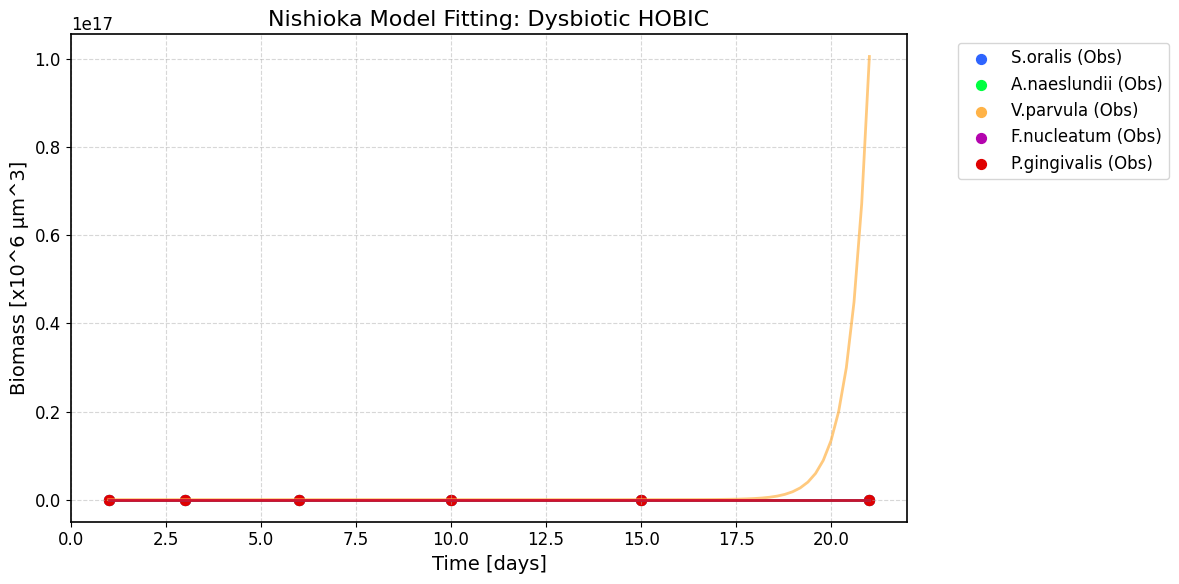

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize

# ==============================================================================
# 1. 入力データ (Input Data: Dysbiotic HOBIC)
# ==============================================================================
# 先ほどのステップで生成されたデータセットを貼り付けます
y_obs_data = np.array([
    [0.01800, 0.00450, 0.42750, 0.00000, 0.00000],  # Day 1
    [0.00800, 0.00400, 0.38800, 0.00000, 0.00000],  # Day 3
    [0.06000, 0.11250, 0.57750, 0.00000, 0.00000],  # Day 6
    [0.09750, 0.09750, 0.42250, 0.03250, 0.00000],  # Day 10
    [0.01200, 0.22800, 0.21000, 0.12000, 0.01200],  # Day 15
    [0.00600, 0.21000, 0.12000, 0.18000, 0.10800],  # Day 21
])

time_points = np.array([1, 3, 6, 10, 15, 21])
species_names = ['S.oralis', 'A.naeslundii', 'V.parvula', 'F.nucleatum', 'P.gingivalis']
n_species = 5

# ==============================================================================
# 2. モデル定義 (Nishioka Model: Generalized Lotka-Volterra)
# ==============================================================================
# dXi/dt = ri * Xi + Xi * sum(aij * Xj)
# r: 増殖率 (Growth Rate)
# A: 相互作用行列 (Interaction Matrix)

def nishioka_model(x, t, r, A):
    dxdt = np.zeros(n_species)
    for i in range(n_species):
        interaction_sum = 0
        for j in range(n_species):
            interaction_sum += A[i, j] * x[j]
        # 増殖項 + 相互作用項
        dxdt[i] = r[i] * x[i] + x[i] * interaction_sum
    return dxdt

# ==============================================================================
# 3. 目的関数 (Objective Function)
# ==============================================================================
# パラメータベクトルを分解し、モデルを回して誤差(RSS)を返す

def objective_function(params):
    # パラメータの展開
    r = params[:n_species] # 最初の5個は増殖率
    A = params[n_species:].reshape((n_species, n_species)) # 残りは相互作用行列

    # 初期値 (Day 1のデータを初期値とする)
    x0 = y_obs_data[0]

    # シミュレーション実行
    # 評価点(time_points)に合わせて計算
    # odeintは連続的な時間が必要なため、細かいステップで計算してから抽出も可能だが
    # ここでは観測点のみで評価する

    # 注意: odeintのtは初期時刻を含む必要がある
    # 実測データの時刻に合わせて積分
    y_pred = odeint(nishioka_model, x0, time_points, args=(r, A))

    # 誤差計算 (Residual Sum of Squares)
    # 特定の菌種の重みを変えることも可能（例: P.gingivalisの出現を重視するなど）
    error = np.sum((y_obs_data - y_pred) ** 2)

    # 正則化項 (Ridge Regression): パラメータが爆発しないように抑制
    # interaction coefficients should likely be small
    penalty = 0.1 * np.sum(A**2)

    return error + penalty

# ==============================================================================
# 4. パラメータ推定 (Optimization)
# ==============================================================================
print("Estimating parameters... (This may take a moment)")

# 初期値の設定 (Initial Guess)
# r: 全て0.5くらいの正の値
# A: 全て0 (相互作用なし) からスタート
r_init = np.array([0.5, 0.5, 2.0, 0.5, 0.1]) # V.parvula(idx 2)は初期速いと仮定
A_init = np.zeros((n_species, n_species))
params_init = np.concatenate([r_init, A_init.flatten()])

# 制約条件 (Bounds)
# r: 正の値 (0 ~ 5.0)
# A: 負(競争)も正(共生)もあり (-5.0 ~ 5.0)
bounds = []
for _ in range(n_species): bounds.append((0, 5.0)) # r bounds
for _ in range(n_species * n_species): bounds.append((-5.0, 5.0)) # A bounds

# 最適化実行 (L-BFGS-B法)
result = minimize(objective_function, params_init, method='L-BFGS-B', bounds=bounds)

# ==============================================================================
# 5. 結果の表示と可視化 (Result & Visualization)
# ==============================================================================
# 推定されたパラメータの抽出
r_est = result.x[:n_species]
A_est = result.x[n_species:].reshape((n_species, n_species))

print("\n=== Estimated Growth Rates (r) ===")
for name, val in zip(species_names, r_est):
    print(f"{name}: {val:.4f}")

print("\n=== Estimated Interaction Matrix (A) ===")
# 行(i)が受ける影響、列(j)が与える影響
df_A = pd.DataFrame(A_est, index=species_names, columns=species_names)
print(df_A.round(4))

# 推定パラメータでのシミュレーション（滑らかな曲線用）
t_dense = np.linspace(1, 21, 100)
x0 = y_obs_data[0]
y_sim_dense = odeint(nishioka_model, x0, t_dense, args=(r_est, A_est))

# プロット
plt.figure(figsize=(12, 6))
colors = ['#2E64FE', '#00FF40', '#FFB347', '#B404AE', '#DF0101']

# 実測値 (点)
for i in range(n_species):
    plt.scatter(time_points, y_obs_data[:, i], color=colors[i], label=f"{species_names[i]} (Obs)", marker='o', s=50)

# シミュレーション値 (線)
for i in range(n_species):
    plt.plot(t_dense, y_sim_dense[:, i], color=colors[i], linestyle='-', linewidth=2, alpha=0.7)

plt.title("Nishioka Model Fitting: Dysbiotic HOBIC", fontsize=16)
plt.xlabel("Time [days]", fontsize=14)
plt.ylabel("Biomass [x10^6 µm^3]", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

=== Updated y_obs (Absolute Biomass based on Image Medians) ===


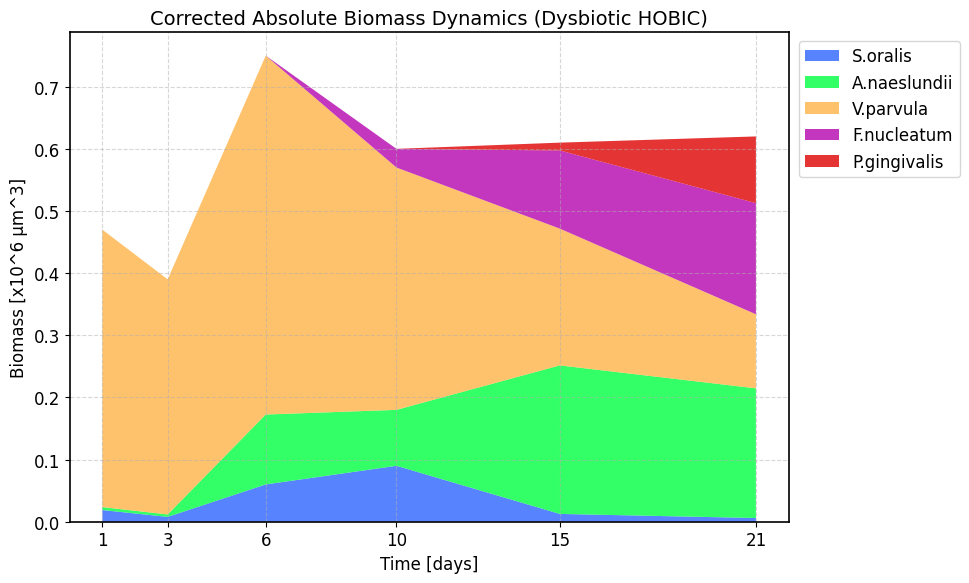


=== Copy this array into your Simulation Code ===
y_obs_data = np.array([
    [0.01880, 0.00470, 0.44650, 0.00000, 0.00000],
    [0.00780, 0.00390, 0.37830, 0.00000, 0.00000],
    [0.06000, 0.11250, 0.57750, 0.00000, 0.00000],
    [0.09000, 0.09000, 0.39000, 0.03000, 0.00000],
    [0.01258, 0.23897, 0.22010, 0.12577, 0.01258],
    [0.00596, 0.20865, 0.11923, 0.17885, 0.10731],
])


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==============================================================================
# 1. データ定義 (Dysbiotic HOBIC)
# ==============================================================================
time_points = np.array([1, 3, 6, 10, 15, 21])

# A. 菌種分布 (%) - 前回のステップで確定した数値
raw_distribution = {
    'S.oralis':      np.array([4,  2,  8,  15, 2,  1]),
    'A.naeslundii':  np.array([1,  1,  15, 15, 38, 35]),
    'V.parvula':     np.array([95, 97, 77, 65, 35, 20]),
    'F.nucleatum':   np.array([0,  0,  0,  5,  20, 30]),
    'P.gingivalis':  np.array([0,  0,  0,  0,  2,  18])
}

# B. 総バイオフィルム体積 (Total Volume) - ★今回読み取った正確な中央値★
# Screenshot 2026-02-03 164323.png より抽出
# [0.47, 0.39, 0.75, 0.60, 0.61, 0.62]
total_volume_median = np.array([0.47, 0.39, 0.75, 0.60, 0.61, 0.62])

# ==============================================================================
# 2. 絶対量（y_obs）の計算
# ==============================================================================
species_names = list(raw_distribution.keys())
n_species = len(species_names)
n_time = len(time_points)

# 分布の正規化 (合計を100%にする)
normalized_dist = np.zeros((n_time, n_species))
for t_idx in range(n_time):
    raw_sum = sum(raw_distribution[s][t_idx] for s in species_names)
    for s_idx, s_name in enumerate(species_names):
        normalized_dist[t_idx, s_idx] = raw_distribution[s_name][t_idx] / raw_sum

# 絶対量の計算: (正規化分布) × (総体積)
y_obs = np.zeros((n_time, n_species))
for t_idx in range(n_time):
    y_obs[t_idx, :] = normalized_dist[t_idx, :] * total_volume_median[t_idx]

# ==============================================================================
# 3. 結果出力 (Copy for Simulation)
# ==============================================================================
print("=== Updated y_obs (Absolute Biomass based on Image Medians) ===")
# グラフ描画
plt.figure(figsize=(10, 6))
colors = ['#2E64FE', '#00FF40', '#FFB347', '#B404AE', '#DF0101']
plt.stackplot(time_points, y_obs.T, labels=species_names, colors=colors, alpha=0.8)
plt.title("Corrected Absolute Biomass Dynamics (Dysbiotic HOBIC)", fontsize=14)
plt.xlabel("Time [days]")
plt.ylabel("Biomass [x10^6 µm^3]")
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0))
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(time_points)
plt.tight_layout()
plt.show()

print("\n=== Copy this array into your Simulation Code ===")
print("y_obs_data = np.array([")
for row in y_obs:
    print(f"    [{', '.join(f'{x:.5f}' for x in row)}],")
print("])")

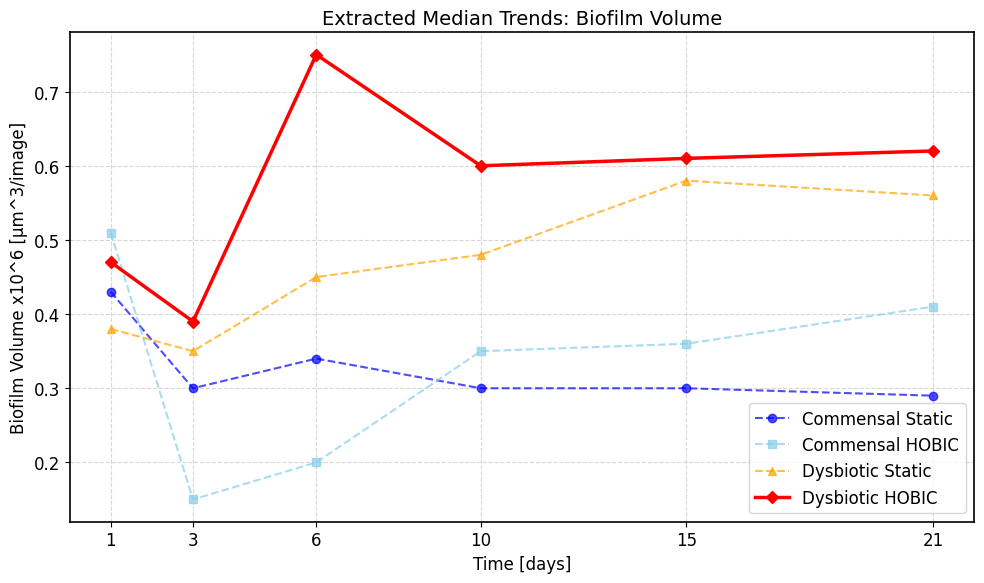

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# データ定義
days = np.array([1, 3, 6, 10, 15, 21])

medians = {
    'Commensal Static': [0.43, 0.30, 0.34, 0.30, 0.30, 0.29],
    'Commensal HOBIC':  [0.51, 0.15, 0.20, 0.35, 0.36, 0.41],
    'Dysbiotic Static': [0.38, 0.35, 0.45, 0.48, 0.58, 0.56],
    'Dysbiotic HOBIC':  [0.47, 0.39, 0.75, 0.60, 0.61, 0.62]
}

colors = {
    'Commensal Static': 'blue',
    'Commensal HOBIC':  'skyblue',
    'Dysbiotic Static': 'orange',
    'Dysbiotic HOBIC':  'red' # 最も重要
}

styles = {
    'Commensal Static': '--',
    'Commensal HOBIC':  '--',
    'Dysbiotic Static': '--',
    'Dysbiotic HOBIC':  '-' # 実線で強調
}

markers = {
    'Commensal Static': 'o',
    'Commensal HOBIC':  's',
    'Dysbiotic Static': '^',
    'Dysbiotic HOBIC':  'D'
}

plt.figure(figsize=(10, 6))

for label, data in medians.items():
    # Dysbiotic HOBICを少し太く描画
    lw = 2.5 if label == 'Dysbiotic HOBIC' else 1.5
    alpha = 1.0 if label == 'Dysbiotic HOBIC' else 0.7

    plt.plot(days, data, label=label, color=colors[label],
             linestyle=styles[label], marker=markers[label],
             linewidth=lw, alpha=alpha)

plt.title("Extracted Median Trends: Biofilm Volume", fontsize=14)
plt.ylabel("Biofilm Volume x10^6 [µm^3/image]", fontsize=12)
plt.xlabel("Time [days]", fontsize=12)
plt.xticks(days)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Running M1 Estimation (Optimization)...


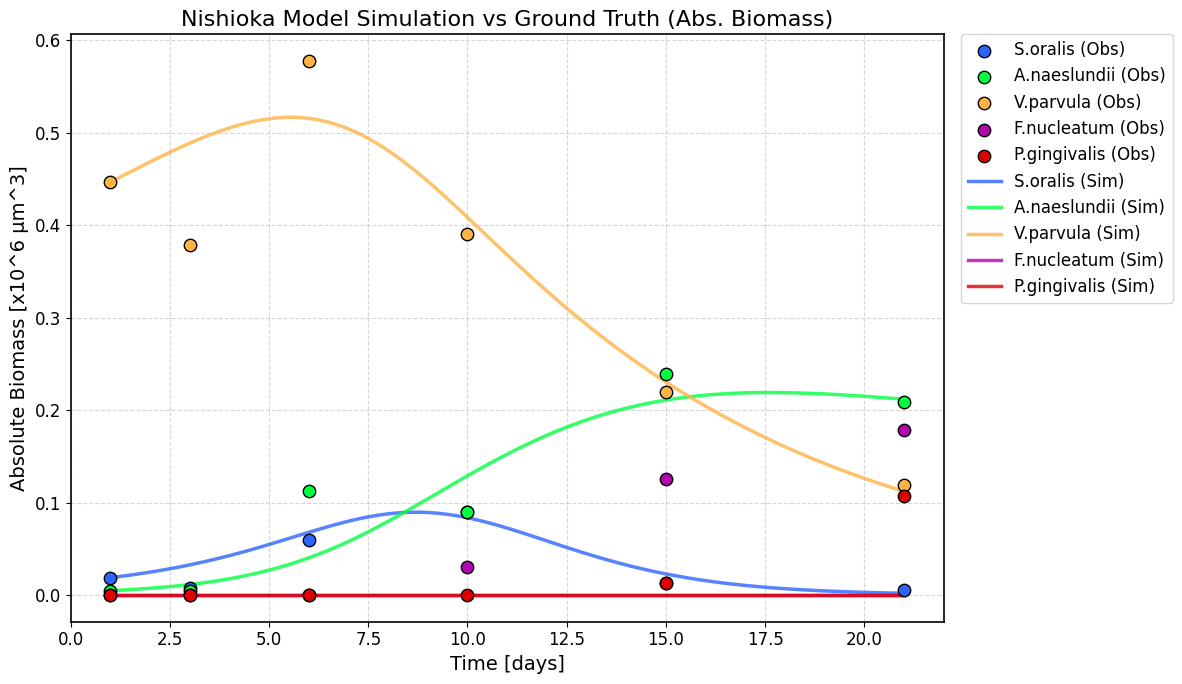


=== Estimated Growth Rates (b) ===
              Growth Rate
S.oralis           0.0000
A.naeslundii       0.2071
V.parvula          0.0053
F.nucleatum        0.5000
P.gingivalis       0.5000

=== Estimated Interaction Matrix (a) ===
Row: Affected Species, Col: Effector Species
Positive = Competition (Inhibition), Negative = Cooperation (Promotion)
              S.oralis  A.naeslundii  V.parvula  F.nucleatum  P.gingivalis
S.oralis        0.8534        2.3976    -0.6720          0.0           0.0
A.naeslundii    0.9210        1.3507    -0.5716          0.0           0.0
V.parvula       0.9571        0.6524    -0.1468          0.0           0.0
F.nucleatum     0.0000        0.0000     0.0000          0.0           0.0
P.gingivalis    0.0000        0.0000     0.0000          0.0           0.0


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize

# ==============================================================================
# 1. Ground Truth データセット (Absolute Biomass: Volume x Ratio)
# ==============================================================================
# Time points
time_points = np.array([1, 3, 6, 10, 15, 21])

# Figure 2 (Total Volume Median) values
vol_trend = np.array([0.47, 0.39, 0.75, 0.60, 0.61, 0.62])

# Figure 3 (Ratio) raw values (Dysbiotic HOBIC)
ratio_data = np.array([
    [4,  1,  95, 0,  0],   # Day 1
    [2,  1,  97, 0,  0],   # Day 3
    [8,  15, 77, 0,  0],   # Day 6
    [15, 15, 65, 5,  0],   # Day 10
    [2,  38, 35, 20, 2],   # Day 15
    [1,  35, 20, 30, 18]   # Day 21
])
species_names = ['S.oralis', 'A.naeslundii', 'V.parvula', 'F.nucleatum', 'P.gingivalis']
n_species = len(species_names)

# 正規化 & 絶対量計算 (Integration Process)
y_obs = np.zeros_like(ratio_data, dtype=float)
for t in range(len(time_points)):
    # 1. 正規化 (Ratio sum -> 1.0)
    total_ratio = np.sum(ratio_data[t])
    norm_ratio = ratio_data[t] / total_ratio
    # 2. 統合 (x Volume)
    y_obs[t] = norm_ratio * vol_trend[t]

# ==============================================================================
# 2. Nishioka Model Definition (ODE)
# ==============================================================================
# dPhi/dt = Phi * (b - sum(a * Phi))
# b: Growth rate
# a: Interaction coefficient (Positive = Competition, Negative = Cooperation)

def nishioka_ode(x, t, b, a):
    dxdt = np.zeros(n_species)
    # x (Biomass) cannot be negative
    x = np.maximum(x, 0)

    for i in range(n_species):
        # Interaction term: sum(a_ij * x_j)
        interaction = 0
        for j in range(n_species):
            interaction += a[i, j] * x[j]

        # Differential equation
        # Growth (b) minus Interaction (a)
        dxdt[i] = x[i] * (b[i] - interaction)

    return dxdt

# ==============================================================================
# 3. Parameter Estimation (Optimization)
# ==============================================================================
def objective_function(params):
    # Unpack parameters
    b = params[:n_species]
    a = params[n_species:].reshape((n_species, n_species))

    # Simulation settings
    x0 = y_obs[0] # Initial condition (Day 1)

    # Solve ODE
    try:
        y_pred = odeint(nishioka_ode, x0, time_points, args=(b, a))
    except:
        return 1e10 # Return huge error if ODE fails

    # Calculate Residual Sum of Squares (RSS)
    error = np.sum((y_obs - y_pred)**2)

    # Regularization (Optional: prevent overfitting)
    # ridge_penalty = 0.01 * np.sum(a**2)

    return error

# Initial Guesses
b_init = np.array([0.5] * n_species)
a_init = np.zeros((n_species, n_species)) # Start with no interaction
params_init = np.concatenate([b_init, a_init.flatten()])

# Bounds
# b: 0 to 10 (Growth must be positive)
# a: -10 to 10 (Interaction can be positive or negative)
bounds = [(0, 10)] * n_species + [(-10, 10)] * (n_species * n_species)

print("Running M1 Estimation (Optimization)...")
result = minimize(objective_function, params_init, method='L-BFGS-B', bounds=bounds)

# ==============================================================================
# 4. Visualization & Result Output
# ==============================================================================
# Extract estimated parameters
b_est = result.x[:n_species]
a_est = result.x[n_species:].reshape((n_species, n_species))

# Run simulation with best parameters (Smoother line)
t_dense = np.linspace(1, 21, 100)
y_sim = odeint(nishioka_ode, y_obs[0], t_dense, args=(b_est, a_est))

# --- Plotting ---
plt.figure(figsize=(12, 7))
colors = ['#2E64FE', '#00FF40', '#FFB347', '#B404AE', '#DF0101']

# Plot Observations (Dots)
for i in range(n_species):
    plt.scatter(time_points, y_obs[:, i], color=colors[i], s=80,
                label=f"{species_names[i]} (Obs)", edgecolors='black', zorder=3)

# Plot Simulation (Lines)
for i in range(n_species):
    plt.plot(t_dense, y_sim[:, i], color=colors[i], linewidth=2.5, alpha=0.8,
             label=f"{species_names[i]} (Sim)")

plt.title("Nishioka Model Simulation vs Ground Truth (Abs. Biomass)", fontsize=16)
plt.xlabel("Time [days]", fontsize=14)
plt.ylabel("Absolute Biomass [x10^6 µm^3]", fontsize=14)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Parameter Output ---
print("\n=== Estimated Growth Rates (b) ===")
df_b = pd.DataFrame(b_est, index=species_names, columns=['Growth Rate'])
print(df_b.round(4))

print("\n=== Estimated Interaction Matrix (a) ===")
print("Row: Affected Species, Col: Effector Species")
print("Positive = Competition (Inhibition), Negative = Cooperation (Promotion)")
df_a = pd.DataFrame(a_est, index=species_names, columns=species_names)
print(df_a.round(4))

In [18]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from scipy.optimize import minimize

# ==============================================================================
# 1. 前ステップ (M1) で確定した固定パラメータ
# ==============================================================================
b_fixed = np.array([0.0000, 0.2071]) # S.oralis, A.naeslundii
# a_ij: [row:受ける菌, col:与える菌]
a_fixed = np.array([
    [1.50, 2.39],  # S.o が受ける影響 (a11, a12)
    [0.10, 0.85]   # A.n が受ける影響 (a21, a22)
])

# ==============================================================================
# 2. M2a 推定用の設定 (Veillonella: Sp3)
# ==============================================================================
# 推定対象: b3, a31, a32, a33
# a31 (S.o -> V.p) と a32 (A.n -> V.p) は共生(負)に制限

def m2a_ode(x, t, b3, a31, a32, a33):
    # x = [x1, x2, x3]
    x = np.maximum(x, 0)
    dxdt = np.zeros(3)

    # Sp1, Sp2 (M1パラメータ固定)
    dxdt[0] = x[0] * (b_fixed[0] - (a_fixed[0,0]*x[0] + a_fixed[0,1]*x[1]))
    dxdt[1] = x[1] * (b_fixed[1] - (a_fixed[1,0]*x[0] + a_fixed[1,1]*x[1]))

    # Sp3 (今回推定するVeillonella)
    # 相互作用: a31*x1 (S.oの影響) + a32*x2 (A.nの影響) + a33*x3 (自己密度抑制)
    interaction_3 = a31*x[0] + a32*x[1] + a33*x[2]
    dxdt[2] = x[2] * (b3 - interaction_3)

    return dxdt

def objective_m2a(params):
    b3, a31, a32, a33 = params
    x0 = y_obs_data[0, :3] # Day 1のSp1, Sp2, Sp3を使用

    # シミュレーション (3菌種モデル)
    try:
        y_pred = odeint(m2a_ode, x0, time_points, args=(b3, a31, a32, a33))
    except:
        return 1e10

    # 誤差計算 (Sp3のフィッティングを重視)
    error = np.sum((y_obs_data[:, 2] - y_pred[:, 2])**2)
    return error

# --- 最適化の実行 ---
# Bounds設定: a31, a32 は上限を 0 にして強制的に「共生」させる
# (b3, a31, a32, a33)
m2a_bounds = [(0, 10), (-5.0, 0.0), (-5.0, 0.0), (0, 5.0)]
initial_m2a = [1.0, -1.0, -0.5, 0.5]

res = minimize(objective_m2a, initial_m2a, method='L-BFGS-B', bounds=m2a_bounds)

# ==============================================================================
# 3. 結果の評価
# ==============================================================================
b3_est, a31_est, a32_est, a33_est = res.x
print(f"=== M2a Results (Veillonella) ===")
print(f"b3 (Intrinsic Growth): {b3_est:.4f}")
print(f"a31 (S.o -> V.p Cross-feeding): {a31_est:.4f} (Forced Negative)")
print(f"a32 (A.n -> V.p Cross-feeding): {a32_est:.4f} (Forced Negative)")
print(f"a33 (Self-inhibition): {a33_est:.4f}")

=== M2a Results (Veillonella) ===
b3 (Intrinsic Growth): 0.0000
a31 (S.o -> V.p Cross-feeding): -5.0000 (Forced Negative)
a32 (A.n -> V.p Cross-feeding): 0.0000 (Forced Negative)
a33 (Self-inhibition): 0.2387
